<h1 align='center'> Nebula Phase Photometry Analysis <h1>

## Photometry Notes
- 7 images were taken in each band, each image is a cooadition of a months worth of images
- The total exposure time for all image was 840s = 14min
- The extracted lightcurves are in the following files located within /ZN7090_Nebula/SNAP/cockpit-lc/
    - KSP-ZN7090.B.lc.PS_221110.txt
    - KSP-ZN7090.V.lc.PS_221110.txt
    - KSP-ZN7090.I.lc.PS_221110.txt
- We did not perform image subtraction for lightcurve extraction
    - Convolution added noise to the already faint signal of the SN
    - We did not fit the sky sourrounding the source
    - We only relaxed the height of the PSF for the fitting
    - All raw images were cropped to 2000 x 2000 px
- Number of reference stars used in each band
    - B-band: 23
    - V-band: 36
    - I-band: 17
- Reference star notes
    - Saturation magnitude: 15.0
    - Reference magnitude: 16.0
    - SNR: 3.0
    - Catalog: aavso

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load in nebula phase data
tB, IB, snrB, MB, MB_err, MB_lim = np.loadtxt("KSP-ZN7090.B.lc.PS_221110.txt",skiprows=4,usecols=[0,4,5,6,7,8],unpack=True)
tV, IV, snrV, MV, MV_err, MV_lim = np.loadtxt("KSP-ZN7090.V.lc.PS_221110.txt",skiprows=4,usecols=[0,4,5,6,7,8],unpack=True)
tI, II, snrI, MI, MI_err, MI_lim = np.loadtxt("KSP-ZN7090.I.lc.PS_221110.txt",skiprows=4,usecols=[0,4,5,6,7,8],unpack=True)

from Helpers import Nice_Plots
from matplotlib.ticker import MultipleLocator

In [2]:
# Call nice plots to setup style
Nice_Plots()

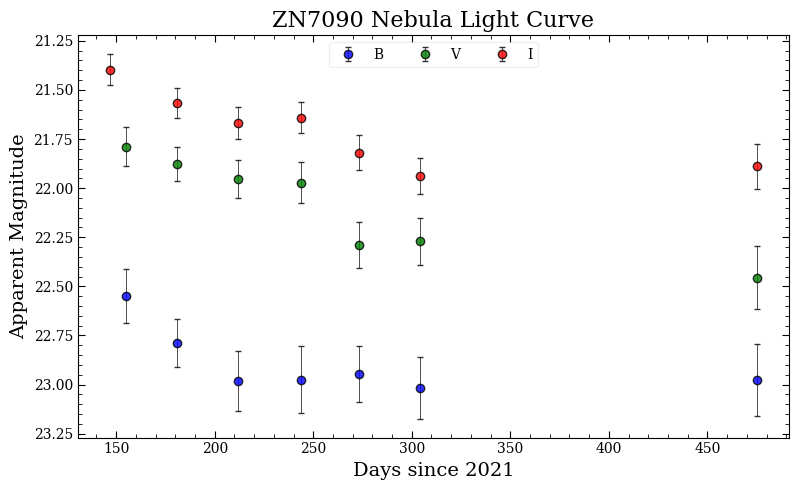

In [3]:
gr = 1.618033988749
scale = 5
fig, a0 = plt.subplots(figsize=(gr*scale,scale))
a0.errorbar(tB,MB,yerr=MB_err,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.errorbar(tV,MV,yerr=MV_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='V',mec='k')
a0.errorbar(tI,MI,yerr=MI_err,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='I',mec='k')
a0.invert_yaxis()
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.set_xlabel("Days since 2021",fontsize=14)
a0.set_title("ZN7090 Nebula Light Curve",fontsize=16)
a0.yaxis.set_minor_locator(MultipleLocator(.05))
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')
a0.legend(fancybox=True,ncol=3,loc='upper center',framealpha=0.3)
plt.tight_layout()
plt.savefig("Uncorrected Nebula LC.png")

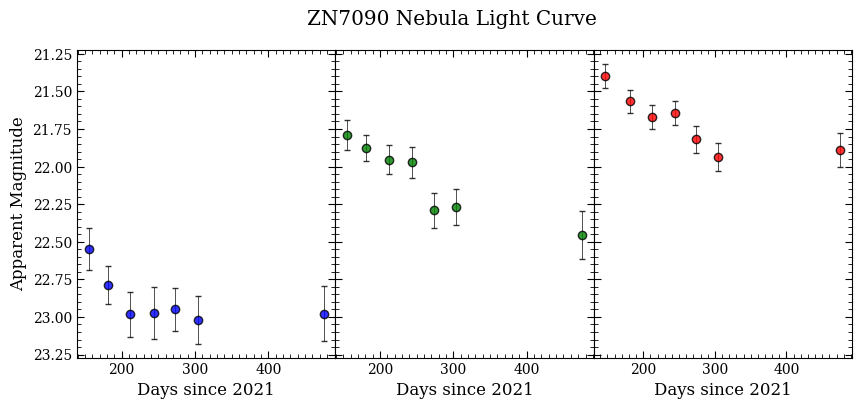

In [30]:
fig, (a0,a1,a2) = plt.subplots(figsize=(10,4),ncols=3,sharey=True)
fig.suptitle("ZN7090 Nebula Light Curve", fontsize='x-large')

a0.errorbar(tB,MB,yerr=MB_err,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.invert_yaxis()
a0.set_ylabel("Apparent Magnitude",fontsize=12)
a0.set_xlabel("Days since 2021",fontsize=12)
a0.yaxis.set_minor_locator(MultipleLocator(.05))
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')

a1.errorbar(tV,MV,yerr=MV_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='V',mec='k')
a1.invert_yaxis()
a1.set_xlabel("Days since 2021",fontsize=12)
a1.xaxis.set_minor_locator(MultipleLocator(10))
a1.yaxis.set_ticks_position('both')
a1.xaxis.set_ticks_position('both')

a2.errorbar(tI,MI,yerr=MI_err,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='I',mec='k')
a2.invert_yaxis()
a2.set_xlabel("Days since 2021",fontsize=12)
a2.xaxis.set_minor_locator(MultipleLocator(10))
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
plt.subplots_adjust(wspace=0, hspace=0)


In [4]:
# Load in the early light curve data
# Bmags, Bmags_err = np.load("Inter_B.npz")['x1'],np.load("Inter_B.npz")['x2']
# Vmags, Vmags_err = np.load("Inter_V.npz")['x1'],np.load("Inter_V.npz")['x2']
# imags, imags_err = np.load("Inter_i.npz")['x1'],np.load("Inter_i.npz")['x2']
# t_early = np.load("Layman_B-V.npz")['t']
import pandas as pd
ZN7090_early = pd.read_csv("KSP-ZN7090_LC_20220309_correct.csv")

In [5]:
ZN7090_early

,date,date[MJD],date_err,telescope,band,M_0,M_0_err,M_0_lim,M_C,M_C_err,M_C_lim,M_E,M_E_err,M_E_lim,binned,binned_images
0,2020-10-06 19:08:45.000001,59128.797743,0.202431,A/S,V,NaN,NaN,21.839,NaN,NaN,21.839,NaN,NaN,21.772,Y,201006_1239.A/201006_2018.S/201006_2116.S/2010...
1,2020-10-06 19:10:45.000000,59128.799132,0.202431,A/S,I,NaN,NaN,21.944,NaN,NaN,21.944,NaN,NaN,21.902,Y,201006_1241.A/201006_2020.S/201006_2118.S/2010...
2,2020-10-06 21:16:40.000000,59128.886574,0.043056,S,B,23.035,0.506,22.247,23.031,1.240,22.035,22.940,1.240,21.944,Y,201006_2016.S/201006_2114.S/201006_2220.S
3,2020-10-07 21:18:00.000000,59129.887500,0.049653,S,B,25.710,4.268,22.597,26.831,5.908,22.385,26.740,5.908,22.294,Y,201007_2009.S/201007_2113.S/201007_2232.S
4,2020-10-07 21:20:00.000000,59129.888889,0.049653,S,V,NaN,NaN,22.232,NaN,NaN,22.232,NaN,NaN,22.165,Y,201007_2011.S/201007_2115.S/201007_2234.S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2020-12-09 10:42:00.000000,59192.445833,0.000000,A,V,20.713,0.099,21.712,20.713,0.099,21.712,20.646,0.099,21.645,N,NaN
130,2020-12-09 10:44:00.000000,59192.447222,0.000000,A,I,20.305,0.126,21.045,20.305,0.126,21.045,20.263,0.126,21.003,N,NaN
131,2020-12-10 01:16:00.000000,59193.052778,0.000000,C,B,21.277,0.087,22.449,21.180,0.124,22.237,21.089,0.124,22.146,N,NaN
132,2020-12-10 01:18:00.000000,59193.054167,0.000000,C,V,20.757,0.076,22.085,20.757,0.076,22.085,20.690,0.076,22.018,N,NaN


In [5]:
# Collect all dates
dates = np.array(ZN7090_early['date[MJD]'],dtype='float')

# Get band index
bands = ZN7090_early["band"]
loc_B = np.where(bands=="B")
loc_V = np.where(bands=="V")
loc_I = np.where(bands=='I')

# Index the corrected magnitude arrays on the bands of interest
all_mags = np.array(ZN7090_early["M_E"])
all_mag_err = np.array(ZN7090_early["M_E_err"])
B_early = all_mags[loc_B]
B_early_err = all_mag_err[loc_B]
V_early = all_mags[loc_V]
V_early_err = all_mag_err[loc_V]
I_early = all_mags[loc_I]
I_early_err = all_mag_err[loc_I]

# Get the respective dates
B_dates = dates[loc_B]
V_dates = dates[loc_V]
I_dates = dates[loc_I]

# Get limiting magnitudes
all_lim_mags = np.array(ZN7090_early["M_E_lim"])
B_lim_mags = all_lim_mags[loc_B]
B_non_det = B_lim_mags[:3]

V_lim_mags = all_lim_mags[loc_V]
V_non_det = V_lim_mags[:3]

I_lim_mags = all_lim_mags[loc_I]
I_non_det = I_lim_mags[:3]

In [6]:
def day_mjd(day, year):
    '''
    ################################################################
    # Desc: Converts day of year float to mjd time.               #
    # ------------------------------------------------------------ #
    # Imports: astropy.time.(Time, TimeDelta)                      #
    # ------------------------------------------------------------ #
    # Input                                                        #
    # ------------------------------------------------------------ #
    #  day: float time in days since start of year YYYY            #
    # year: int reference year YYYY                                #
    # ------------------------------------------------------------ #
    # Output                                                       #
    # ------------------------------------------------------------ #
    # time: float time format in mjd                                 #
    ################################################################
    '''
    
    from astropy.time import Time, TimeDelta
    
    #create astropy time object
    t_ref = str(year)+"-01-01T00:00:00.000"
    t_ref = Time(t_ref, format='isot', scale='utc')
    #create astropy time difference object
    t_diff = TimeDelta(day, format='jd')
    #return isot time
    return (t_ref+t_diff).mjd

# Convert dates of Nebula light curve to isot
tB_mjd = [day_mjd(day,2021) for day in tB]
tV_mjd = [day_mjd(day,2021) for day in tV]
tI_mjd = [day_mjd(day,2021) for day in tI]

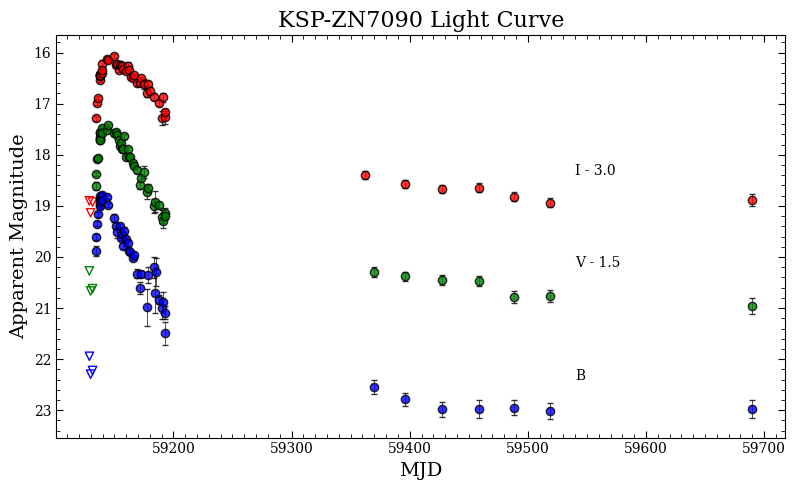

In [8]:
# Define plotting offset for different bands
Voff = 1.5
Ioff = 3.0

# Plot final light curve
scale=5
fig, a0 = plt.subplots(figsize=(gr*scale,scale))
# Early light curve
# B-band
a0.errorbar(B_dates[3:],B_early[3:],yerr=B_early_err[3:],fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.scatter(B_dates[:3],B_non_det,marker="v",facecolors='none',edgecolors='b')
# V-band
a0.errorbar(V_dates[3:],V_early[3:]-Voff,yerr=V_early_err[3:],fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.scatter(V_dates[:3],V_non_det-Voff,marker="v",facecolors='none',edgecolors='g')
# I-band
a0.errorbar(I_dates[3:],I_early[3:]-Ioff,yerr=I_early_err[3:],fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.scatter(I_dates[:3],I_non_det-Ioff,marker="v",facecolors='none',edgecolors='r')

# Nebula light curve
# B-band
a0.errorbar(tB_mjd,MB,yerr=MB_err,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
# V-band
a0.errorbar(tV_mjd,MV-Voff,yerr=MV_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='V',mec='k')
# I-band
a0.errorbar(tI_mjd,MI-Ioff,yerr=MI_err,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='I',mec='k')

a0.set_xlabel("MJD",fontsize=14)
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.set_title("KSP-ZN7090 Light Curve",fontsize=16)
a0.invert_yaxis()
a0.yaxis.set_minor_locator(MultipleLocator(.2))
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')
a0.text(59540,18.4,"I - 3.0")
a0.text(59540,20.2,"V - 1.5")
a0.text(59540,22.4,"B")
plt.tight_layout()

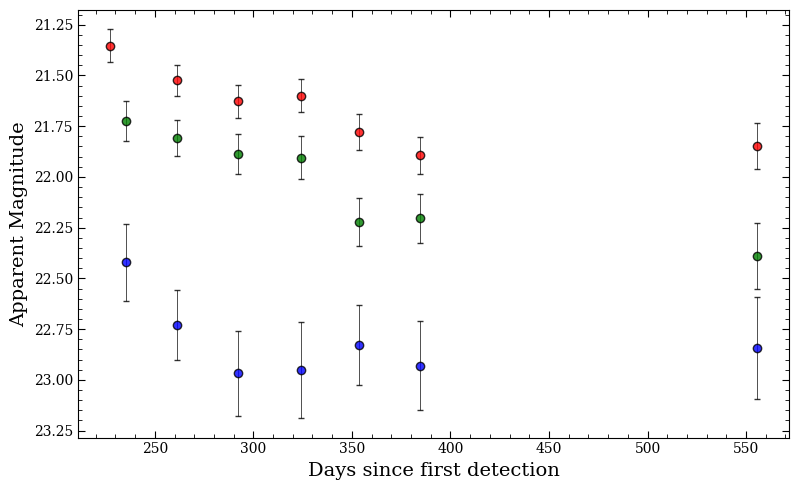

In [19]:
# Read corrected light curves
Bc, Bcerr, Bf, Bferr = np.genfromtxt("KSP-ZN7090.B.lc.PS_221110.Final.txt",usecols=[9,10,11,12],skip_header=4,unpack=True)
Vc, Vcerr, Vf, Vferr = np.genfromtxt("KSP-ZN7090.V.lc.PS_221110.Final.txt",usecols=[9,10,11,12],skip_header=4,unpack=True)
Ic, Icerr, If, Iferr = np.genfromtxt("KSP-ZN7090.I.lc.PS_221110.Final.txt",usecols=[9,10,11,12],skip_header=4,unpack=True)
fig, a0 = plt.subplots(figsize=(gr*scale,scale))
#a0.errorbar(tB,MB,yerr=MB_err,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,mec='k')
a0.errorbar(tB_mjd-B_dates[3],Bf,yerr=Bcerr,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='Color/Ext. Corrected',mec='k')
#a0.errorbar(tV,MV,yerr=MV_err,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,mec='k')
a0.errorbar(tV_mjd-B_dates[3],Vf,yerr=Vcerr,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='Color/Ext. Corrected',mec='k')
#a0.errorbar(tI,MI,yerr=MI_err,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,mec='k')
a0.errorbar(tI_mjd-B_dates[3],If,yerr=Icerr,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='Color/Ext. Corrected',mec='k')

a0.invert_yaxis()
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.set_xlabel("Days since first detection",fontsize=14)
#a0.set_title("ZN7090 Nebula Light Curve",fontsize=16)
a0.yaxis.set_minor_locator(MultipleLocator(.05))
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')
#a0.legend(fancybox=True,ncol=3,loc='upper center',framealpha=0.3)
plt.tight_layout()
plt.savefig("Plots/Nebula Corrected LC.png")

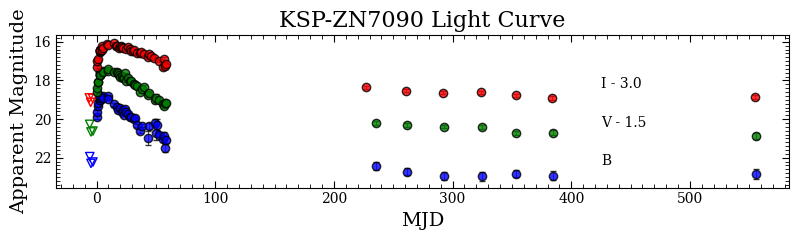

In [12]:
# Set time with respecto to first detection
T0B = B_dates[3]
T0V = V_dates[3]
T0I = I_dates[3]

fig, a0 = plt.subplots(figsize=(gr*scale,scale/2))
# Early light curve
# B-band
a0.errorbar(B_dates[3:]-T0B,B_early[3:],yerr=B_early_err[3:],fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.scatter(B_dates[:3]-T0B,B_non_det,marker="v",facecolors='none',edgecolors='b')
# V-band
a0.errorbar(V_dates[3:]-T0V,V_early[3:]-Voff,yerr=V_early_err[3:],fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.scatter(V_dates[:3]-T0V,V_non_det-Voff,marker="v",facecolors='none',edgecolors='g')
# I-band
a0.errorbar(I_dates[3:]-T0I,I_early[3:]-Ioff,yerr=I_early_err[3:],fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
a0.scatter(I_dates[:3]-T0I,I_non_det-Ioff,marker="v",facecolors='none',edgecolors='r')

# Nebula light curve
# B-band
a0.errorbar(tB_mjd-T0B,Bf,yerr=Bferr,fmt='bo',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='B',mec='k')
# V-band
a0.errorbar(tV_mjd-T0V,Vf-Voff,yerr=Vferr,fmt='go',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='V',mec='k')
# I-band
a0.errorbar(tI_mjd-T0I,If-Ioff,yerr=Iferr,fmt='ro',ecolor='k',elinewidth=0.6,capsize=2,alpha=0.8,label='I',mec='k')

a0.set_xlabel("MJD",fontsize=14)
a0.set_ylabel("Apparent Magnitude",fontsize=14)
a0.set_title("KSP-ZN7090 Light Curve",fontsize=16)
a0.invert_yaxis()
a0.yaxis.set_minor_locator(MultipleLocator(.2))
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')
a0.text(425,18.4,"I - 3.0")
a0.text(425,20.4,"V - 1.5")
a0.text(425,22.4,"B")
plt.tight_layout()
#plt.savefig("Plots/ZN7090_Final_LC.png")

In [13]:
def m2M(m,merr,z):
    import numpy as np
    import scipy.integrate as integrate
    import astropy.units as u
    from astropy.constants import c
    from uncertainties import unumpy,ufloat
    from uncertainties.umath import log

    # Define cosmological density parameters and H0 as mathew did
    OM = 0.27
    OK = 0.00
    OL = 0.73
    H0 = (74.2*u.km/u.s/u.Mpc).to(1/u.s)

    # # Parameters used by afsariard
    # H0 = (67.4*u.km/u.s/u.Mpc).to(1/u.s)
    # OM = 0.315
    # OK = 0.00
    # OL = 0.685

    # Numerically integrate for the comoving distance at z
    def func(z,M,K,L):
        return(1/np.sqrt(M*(1+z)**3 + K*(1+z)**2 + L))
    val = integrate.quad(func,0,z,args=(OM,OK,OL))
    DC = c/H0 * val
    # Compute comovin distance
    DL = DC*(1+z)
    # Compute luminosity disance
    Dl, Dl_err = DL[0], DL[1]
    m_u = unumpy.uarray(m,merr)
    print(Dl.to(u.Mpc))

    M = m_u - 5*np.log10((Dl.to(u.pc)).value/((10*u.pc)).value)
    return(unumpy.nominal_values(M),unumpy.std_devs(M))

In [14]:
# Concatenate early and tail phase light curves
MB_comp = np.concatenate([B_early,MB])
MB_comp_err = np.concatenate([B_early_err,MB_err])
tB_comp = np.concatenate([B_dates,tB_mjd])

MV_comp = np.concatenate([V_early,MV])
MV_comp_err = np.concatenate([V_early_err,MV_err])
tV_comp = np.concatenate([V_dates,tV_mjd])

MI_comp = np.concatenate([I_early,MI])
MI_comp_err = np.concatenate([I_early_err,MI_err])
tI_comp = np.concatenate([I_dates,tI_mjd])

# Define redshift
z = 0.08739904944703399
# Compute absolute magnitudes
B_abs,B_abs_err = m2M(MB_comp,MB_comp_err,z)
V_abs,V_abs_err = m2M(MV_comp,MV_comp_err,z)
I_abs,I_abs_err = m2M(MI_comp,MI_comp_err,z)

377.0444679735511 Mpc
377.0444679735511 Mpc
377.0444679735511 Mpc


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2387: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


In [15]:
# Write B-band light curve in .txt file
f = open("ZN7090_BBand.txt",'w')
f.write("Time, B-Band Mag, B-band Uncertainty, Stage \n")
f.write("(MJD), (Apparent), (Apparent),  \n")
for i in range(len(B_dates)):
    f.write(f"{B_dates[i]}, {B_early[i]}, {B_early_err[i]}, Early \n")
for i in range(len(tB_mjd)):
    f.write(f"{tB_mjd[i]}, {Bf[i]}, {Bferr[i]}, Nebula \n")
f.close()


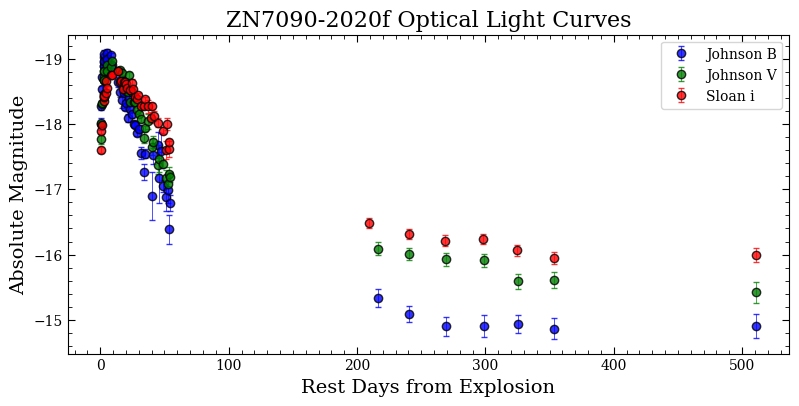

In [17]:
fig, a0 = plt.subplots(figsize=(gr*scale,scale/1.2))
a0.set_title("ZN7090-2020f Optical Light Curves",fontsize=16)
a0.set_ylabel("Absolute Magnitude",fontsize=14)
a0.set_xlabel("Rest Days from Explosion",fontsize=14)
a0.errorbar((tB_comp[3:]-T0B+0.2320)/(1+z),B_abs[3:],yerr=B_abs_err[3:],fmt='bo',mec='k',elinewidth=0.6,capsize=2,alpha=0.8,label='Johnson B')
a0.errorbar((tV_comp[3:]-T0V+0.2320)/(1+z),V_abs[3:],yerr=V_abs_err[3:],fmt='go',mec='k',elinewidth=0.6,capsize=2,alpha=0.8,label='Johnson V')
a0.errorbar((tI_comp[3:]-T0I+0.2320)/(1+z),I_abs[3:],yerr=I_abs_err[3:],fmt='ro',mec='k',elinewidth=0.6,capsize=2,alpha=0.8,label='Sloan i')
a0.invert_yaxis()
a0.yaxis.set_minor_locator(MultipleLocator(.2))
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')
#a0.grid(ls='--')
a0.legend()
# a0.set_xscale('log')
plt.tight_layout()
plt.savefig("Plots/Abs LC.png")


In [20]:
Verr = V_abs_err[3:]
print("Peak B-band Mag:",np.min(B_abs[3:]))
print("Peak V-band Mag:",np.min(V_abs[3:]),"(pm)",Verr[np.where(V_abs[3:]==np.min(V_abs[3:]))])
print("Peak i-band Mag:",np.min(I_abs[3:]))

Peak B-band Mag: -19.091962865838866
Peak V-band Mag: -18.960962865838866 (pm) [0.027]
Peak i-band Mag: -18.817962865838865


<h1 align='center'>Learning how to use MCMC routines fof fitting<h1>

In [43]:
import numpy as np
import emcee
# The model function should take as an argument a list representing our theta vector, 
# and return the model evaluated at that theta
def model(theta,t):
    a0, a1, a2, a3, a4, a5, a6 = theta
    model = a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4 * a5*t**5 + a6*t**6
    return model
    
def lnlike(theta,x,y,yerr):
    ymodel = model(theta,x)
    Lnlike = -0.5*np.sum((y-ymodel)**2/yerr**2)
    return Lnlike

def lnprior(theta):
    a0,a1,a2,a3,a4,a5,a6 = theta
    
    # Higher order terms should be smaller
    if a0 > -20 and a1 < 20:
        if a1 > -1 and a1 < 1:
            if a2 > -1 and a2 < 1:
                if a3 > -1 and a3 < 1:
                    if a4 > -1 and a4 < 1:
                        if a5 > -1 and a5 < 1:
                            if a6 >-1  and a6 <1:
                                # Ensure all coeffcients are small
                                return 0.0
    return(-np.inf)

def lnprob(theta,x,y,yerr):
    lp = lnprior(theta)
    if lp == 0.0:
        return lp + lnlike(theta,x,y,yerr)
    return -np.inf

def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [44]:
domain ,data_y, data_err = tB_comp[3:-7]-tB_comp[3], B_abs[3:-7], B_abs_err[3:-7]
data = (domain,data_y,data_err)
nwalkers = 200
niter = 2000
initial = np.array([-1.92080072e+01,  3.39559404e-02, -6.23982637e-06, -3.12153866e-07, 1.03043455e-04, -1.46245674e-19,  3.96633134e-15])
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]


In [45]:
# def model(t,a0,a1,a2,a3,a4,a5,a6):
#     #a0, a1, a2, a3, a4, a5 = theta
#     model = a0 + a1*t + a2*t**2 + a3*t**3 + a4*t**4 * a5*t**5 + a6*t**6
#     return model
# from scipy.optimize import curve_fit
# popt, pcov = curve_fit(model,domain,data_y,sigma=data_err)
# smooth_x = np.linspace(0,np.max(domain),500)
# fig,ax = plt.subplots()
# ax.scatter(domain,data_y)
# ax.plot(smooth_x,model(smooth_x,*popt))
# ax.invert_yaxis()
# # ax.set_xlim([0,40])
# plt.show()
# popt

In [46]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)

Running burn-in...


Running production...


In [47]:
def plotter(sampler,x,y,yerr):
    fig ,ax = plt.subplots(figsize=(8,4))
    ax.errorbar(x,y,yerr=yerr,fmt='bo',mec='k')
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        ax.plot(x, model(theta, x), color="c", alpha=0.1)
    theta_max  = samples[np.argmax(sampler.flatlnprobability)]
    ax.plot(domain,model(theta_max,domain),c='b',ls='-.')
    ax.set_xlabel('MJD')
    ax.set_ylabel(r'Absolute Magnitude')
    ax.invert_yaxis()
    # ax.set_ylim([-14,-2e1])
    # ax.set_xlim([-,60])
    plt.show()


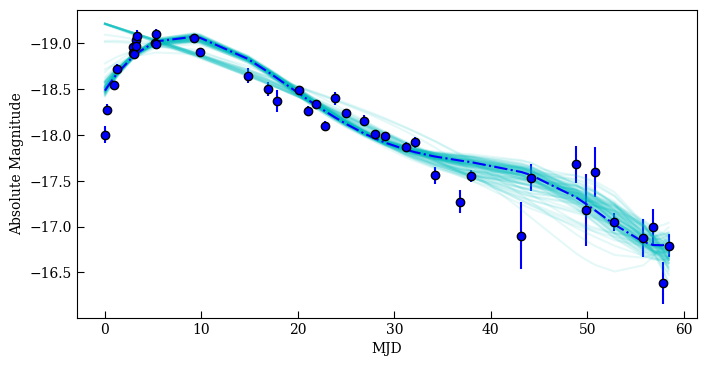

Best Parameters: [-1.84796105e+01 -1.64244882e-01  1.32452856e-02 -2.54216401e-04
 -2.12075237e-04  6.23642891e-12  6.84931786e-10]


In [48]:
samples = sampler.flatchain
theta_max  = samples[np.argmax(sampler.flatlnprobability)]
plotter(sampler,domain,data_y,data_err)
print("Best Parameters:",theta_max)

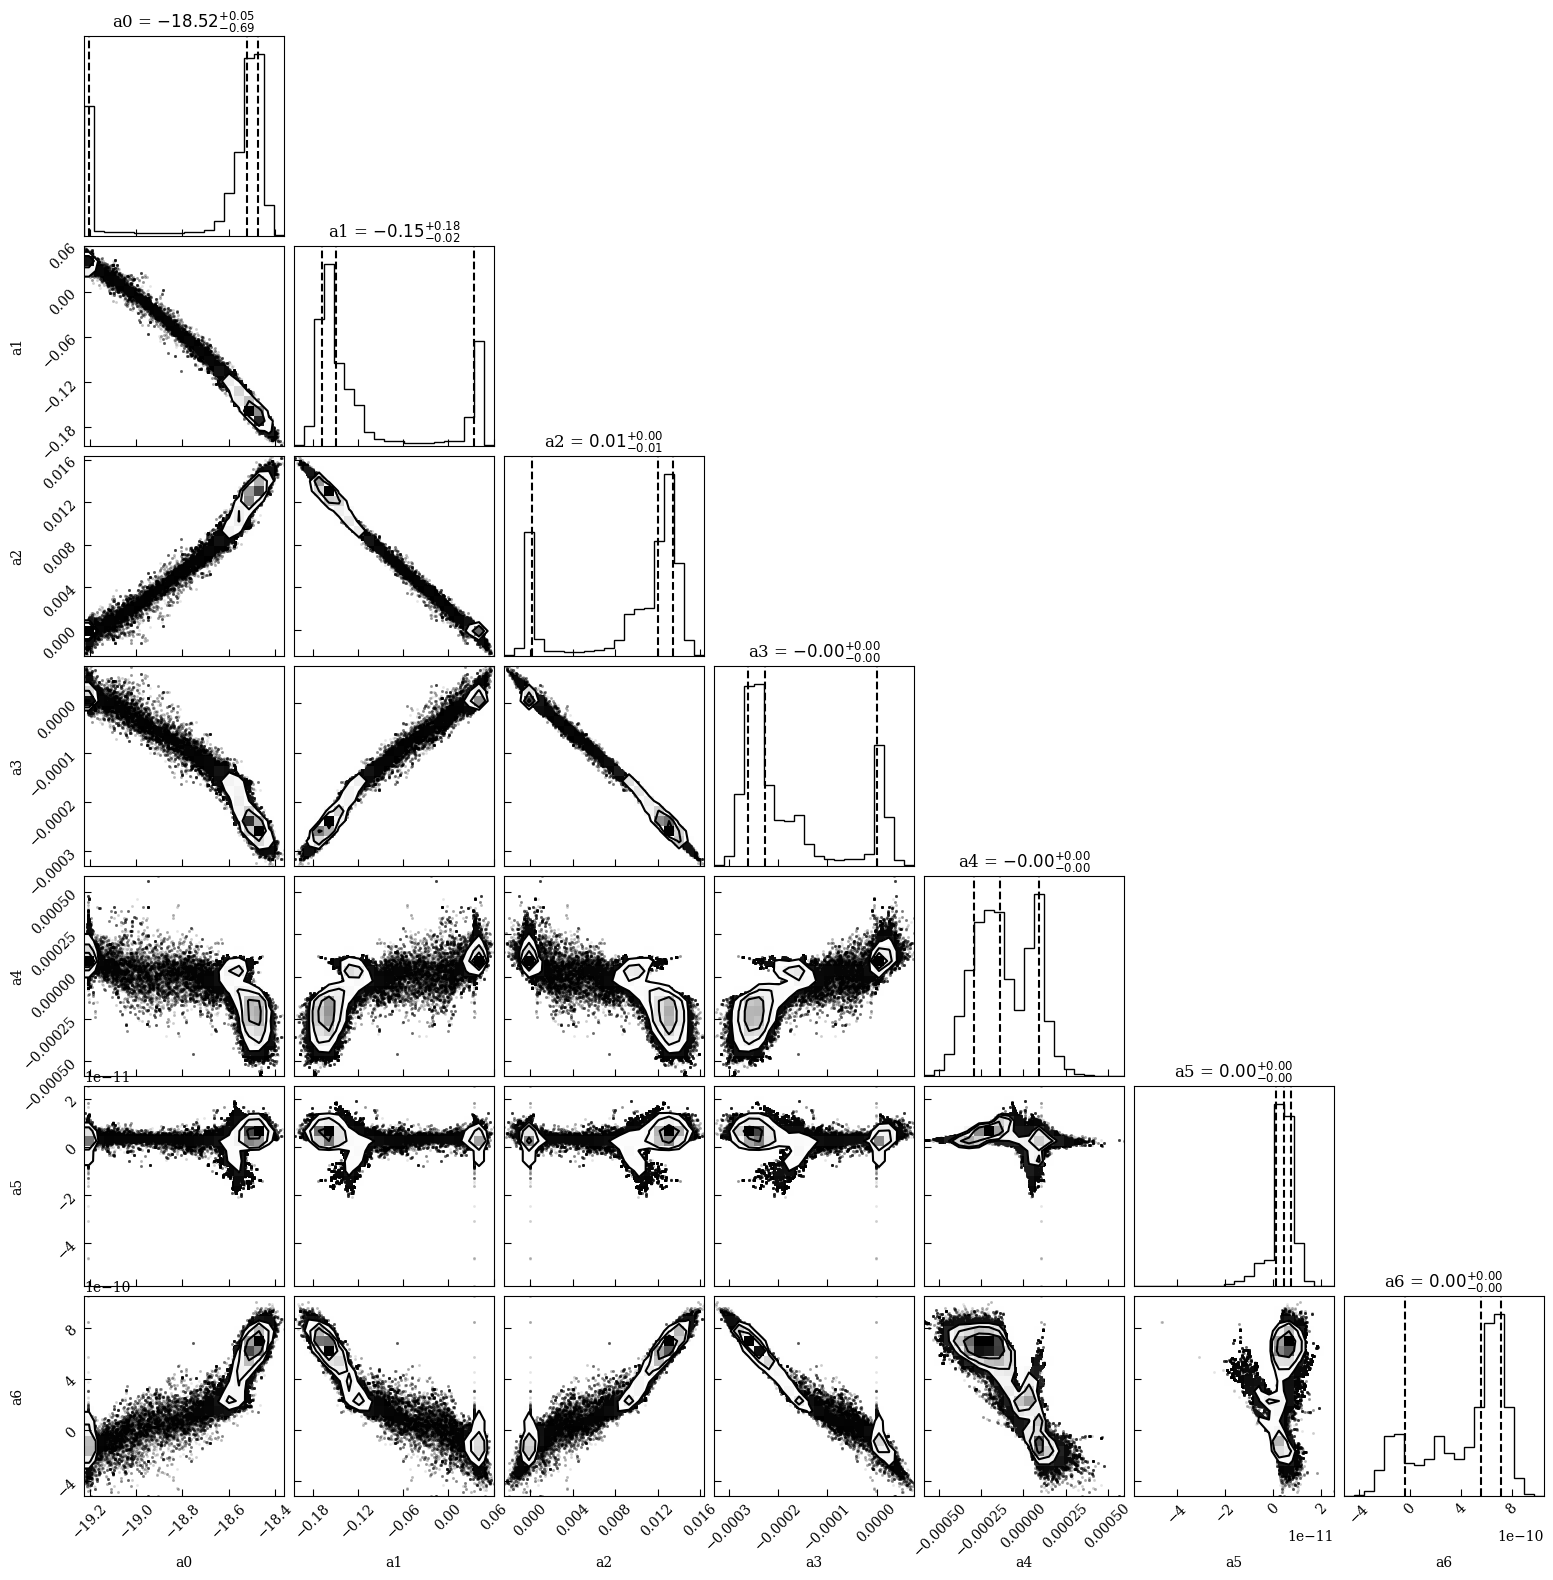

In [49]:
import corner
labels = ['a0','a1','a2','a3','a4','a5','a6']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

In [50]:
def sample_walkers(nsamples,flattened_chain):
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    smooth_x = np.linspace(0,np.max(domain),500)
    for i in thetas:
        mod = model(i,smooth_x)
        models.append(mod)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread
med_model, spread = sample_walkers(100,samples)

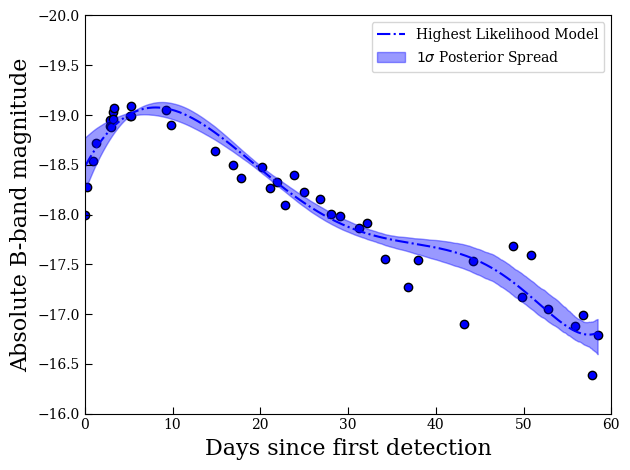

In [51]:
smooth_x = np.linspace(0,np.max(domain),500)
fig, ax = plt.subplots()
ax.scatter(domain,data_y,c='b',edgecolors='k')
ax.plot(smooth_x,model(theta_max,smooth_x),c='b',ls='-.',label='Highest Likelihood Model')
ax.fill_between(smooth_x,med_model-spread,med_model+spread,color='b',alpha=0.4,label=r'$1\sigma$ Posterior Spread')
ax.set_xlim([0,60])
ax.set_ylim([-16,-20])
ax.set_ylabel("Absolute B-band magnitude",fontsize=16)
ax.set_xlabel("Days since first detection",fontsize=16)
ax.legend()
plt.tight_layout()

<h1 align='center'> Analysis <h1>

Look at color plots for nebula by interpolating V-band light curves to the B-band dates

In [21]:
# Define linear interpolation function for B-V bolometric correction
Vin = np.interp(tB_mjd,tV_mjd,Vf)
Vin_err = np.interp(tB_mjd,tV_mjd,Vferr)

In [22]:
# Define (B-V) bolometric corrections from Martinez et al. 2021
def Correct(B,V,Berr,Verr,c0,c1,c2,c3,c4):
    N = 1000
    Color = []
    Colorerr = []
    Terms = []
    TermsErr = []
    MagBol = []
    MagBolErr = []
    for i in range(len(B)):
        # Gaussian Sample
        Bs = np.random.normal(loc=B[i],scale=Berr[i],size=N)
        Vs = np.random.normal(loc=V[i],scale=Verr[i],size=N)
        # Compute Color
        BV = Bs - Vs
        # Compute bolometric correction
        BC = c0 + c1*BV + c2*BV**2 + c3*BV**3 + c4*BV**4
        # Compute bolometric magnitude
        mbol =  BC + Vs
        # Append to lists
        Color.append(np.mean(BV))
        Colorerr.append(np.std(BV))
        Terms.append(np.mean(BC))
        TermsErr.append(np.std(BC))
        MagBol.append(np.mean(mbol))
        MagBolErr.append(np.std(mbol))
    return(Color,Colorerr,Terms,TermsErr,MagBol,MagBolErr)

In [23]:
eff_range = [0.46,1.78]
coeff = [-2.696, 11.532, -18.805, 13.040, -3.315]
Color, ColorErr, Terms, TermsErr, MagBol, MagBolErr = Correct(Bf,Vin,Bferr,Vin_err,*coeff)
Corr  = lambda x: coeff[0] + coeff[1]*x + coeff[2]*x**2 + coeff[3]*x**3 + coeff[4]*x**4

 

In [24]:
# Try bolometric corrections without Gaussian sampling
from uncertainties import unumpy
BUarr = unumpy.uarray(Bf,Bferr)
VUarr = unumpy.uarray(Vin,Vin_err)

ColorUarr = BUarr - VUarr
TermsUarr = Corr(ColorUarr)
MbolUarr = VUarr + TermsUarr

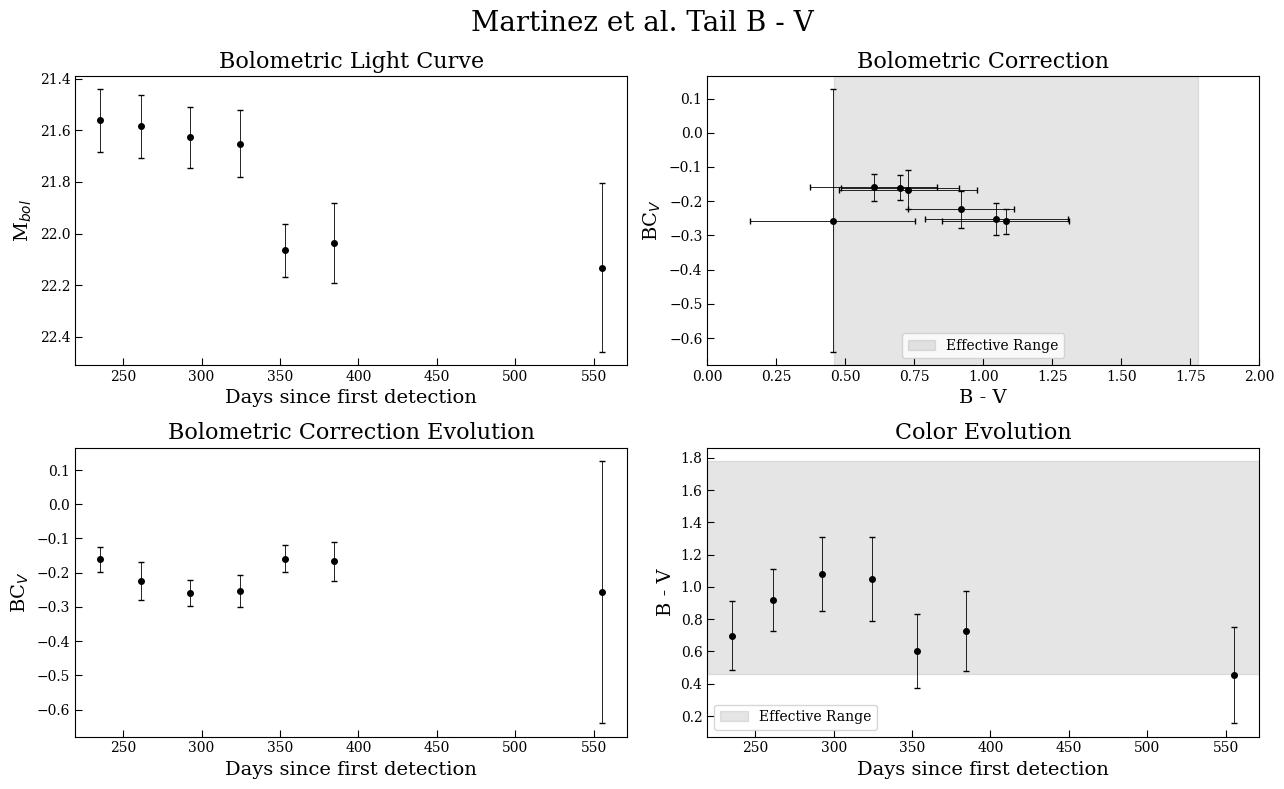

In [25]:
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(gr*8,8),ncols=2,nrows=2)
a0.errorbar(tB_mjd-T0B,unumpy.nominal_values(MbolUarr),yerr=unumpy.std_devs(MbolUarr),\
    fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
fig.suptitle("Martinez et al. Tail B - V", fontsize='20')
a0.set_xlabel("Days since first detection",fontsize=14)
a0.set_ylabel(r"M$_{bol}$",fontsize=14)
a0.set_title("Bolometric Light Curve",fontsize=16)
a0.invert_yaxis()

a1.errorbar(unumpy.nominal_values(ColorUarr),unumpy.nominal_values(TermsUarr),\
    xerr=unumpy.std_devs(ColorUarr),yerr=unumpy.std_devs(TermsUarr),fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
a1.axvspan(eff_range[0], eff_range[1] , alpha=0.2, color='gray',label="Effective Range")
a1.set_xlabel("B - V",fontsize=14)
a1.set_ylabel(r"BC$_{V}$",fontsize=14)
a1.set_title("Bolometric Correction",fontsize=16)
a1.set_xlim([0,2])
a1.legend()

a3.errorbar(tB_mjd-T0B,unumpy.nominal_values(ColorUarr),yerr=unumpy.std_devs(ColorUarr)\
    ,fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
a3.axhspan(eff_range[0], eff_range[1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel("Days since first detection",fontsize=14)
a3.set_ylabel("B - V",fontsize=14)
a3.set_title("Color Evolution",fontsize=16)
a3.legend()

a2.errorbar(tB_mjd-T0B,unumpy.nominal_values(TermsUarr),yerr=unumpy.std_devs(TermsUarr)\
    ,fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
a2.set_xlabel("Days since first detection",fontsize=14)
a2.set_ylabel(r"BC$_{V}$",fontsize=14)
a2.set_title("Bolometric Correction Evolution",fontsize=16)

plt.tight_layout()
plt.savefig("Plots/Nebula_BC.png")

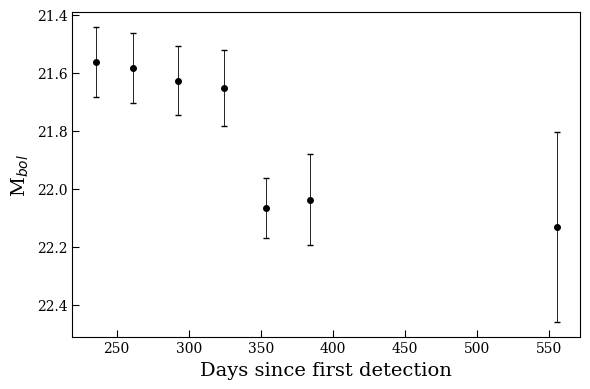

In [43]:
fig, a0 = plt.subplots(figsize=(6,4))
a0.errorbar(tB_mjd-T0B,unumpy.nominal_values(MbolUarr),yerr=unumpy.std_devs(MbolUarr),\
    fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
a0.set_xlabel("Days since first detection",fontsize=14)
a0.set_ylabel(r"M$_{bol}$",fontsize=14)
#a0.set_title("Bolometric Light Curve",fontsize=16)
a0.invert_yaxis()
plt.tight_layout()
plt.savefig("Plots/Nebula_BC_LC.pdf")

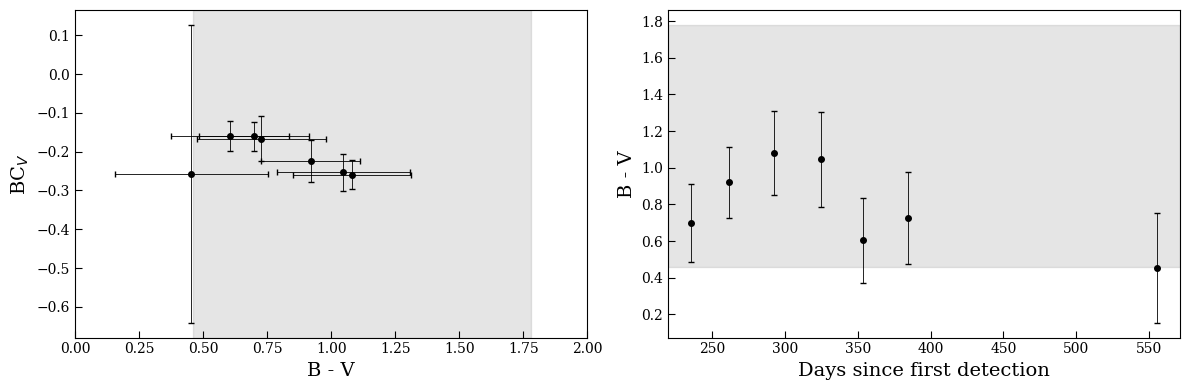

In [42]:
Color_fine = np.linspace(0.25,1.75,100)
fig, (a1,a3) = plt.subplots(figsize=(12,4),ncols=2)
a1.errorbar(unumpy.nominal_values(ColorUarr),unumpy.nominal_values(TermsUarr),\
    xerr=unumpy.std_devs(ColorUarr),yerr=unumpy.std_devs(TermsUarr),fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
a1.axvspan(eff_range[0], eff_range[1] , alpha=0.2, color='gray',label="Effective Range")
#a1.plot(Color_fine,Corr(Color_fine),ls='--',c='k')
a1.set_xlabel("B - V",fontsize=14)
a1.set_ylabel(r"BC$_{V}$",fontsize=14)
a1.set_xlim([0,2])
#a1.legend()

a3.errorbar(tB_mjd-T0B,unumpy.nominal_values(ColorUarr),yerr=unumpy.std_devs(ColorUarr)\
    ,fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
a3.axhspan(eff_range[0], eff_range[1] , alpha=0.2, color='gray',label="Effective Range")
a3.set_xlabel("Days since first detection",fontsize=14)
a3.set_ylabel("B - V",fontsize=14)
#a3.legend()
plt.tight_layout()



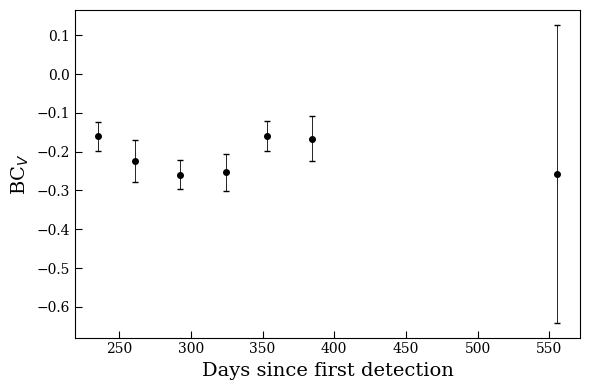

In [44]:
fig, a2 = plt.subplots(figsize=(6,4))
a2.errorbar(tB_mjd-T0B,unumpy.nominal_values(TermsUarr),yerr=unumpy.std_devs(TermsUarr)\
    ,fmt='ko',ecolor='k',capsize=2,elinewidth=0.6,ms=4)
a2.set_xlabel("Days since first detection",fontsize=14)
a2.set_ylabel(r"BC$_{V}$",fontsize=14)
#a2.set_title("Bolometric Correction Evolution",fontsize=16)
plt.tight_layout()

## Calculating N56 Mass from Tail Phase Light Curve
We will use Hamuy's 2003 analytical model
$$
M_{Ni} = (7.866 \times 10^{44})L_t \text{exp}\left(\frac{(t_t-t_0)/(1+z) - 6.1}{111.26}\right) M_{\odot}
$$
Where $t_0$ is the epoch of first light, $t_t$ is the time at which we measure the characteristic $V$ magnitude of the tail, $z$ is the redshift and $L_t$ is the tail's luminosity in $\mathrm{erg \, s^{-1}}$

In [57]:
import scipy.integrate as integrate
import astropy.units as u
from astropy.constants import c

# Calculate bolometric luminosity given bolomtric magnitudes
z = 0.08739904944703399
# Define cosmological density parameters
OM = 0.27
OK = 0.00
OL = 0.73

# Numerically integrate for the comoving distance at z=0.087
def func(z,M,K,L):
    return(1/np.sqrt(M*(1+z)**3 + K*(1+z)**2 + L))

val = integrate.quad(func,0,z,args=(OM,OK,OL))

# Define Hubble constant and compute luminosity distance
H = (74.2*u.km/u.s/u.Mpc).to(1/u.s) # 1/s
DC = c/H *val
DL = DC*(1+z)
Dl, Dl_err = DL[0], DL[1]
print("Distance to ZN-7090")
print(Dl.to(u.Mpc),"(+/-)",Dl_err.to(u.Mpc))

Distance to ZN-7090
377.0444679735511 Mpc (+/-) 4.186034496517789e-12 Mpc


In [58]:
def Bolometric_L(mapp,mapp_err,z):
    '''Function computes the bolometric luminosities
    of the apparend magntiudes at a given redshift. This
    function uses the cosmologica density parameters from
    Riess et al. 2016, and Ho=74.2'''
    
    import numpy as np
    import scipy.integrate as integrate
    import astropy.units as u
    from astropy.constants import c
    from uncertainties import unumpy

    # Define cosmological density parameters and H0
    OM = 0.27
    OK = 0.00
    OL = 0.73
    H0 = (74.2*u.km/u.s/u.Mpc).to(1/u.s)

    # Numerically integrate for the comoving distance at z
    def func(z,M,K,L):
        return(1/np.sqrt(M*(1+z)**3 + K*(1+z)**2 + L))
    val = integrate.quad(func,0,z,args=(OM,OK,OL))
    DC = c/H0 * val
    # Compute comovin distance
    DL = DC*(1+z)
    # Compute luminosity disance
    Dl, Dl_err = DL[0], DL[1]

    # Compute absolute magnitude
    m = unumpy.uarray(mapp,mapp_err)
    M = m - 5*np.log10((Dl.to(u.pc)).value/((10*u.pc)).value)
    
    # Define sun's luminosity and absolute magnitude
    Lsun = 3.845e33 #erg/s
    Msun = 4.74

    # Compute bolometric liminosity 
    L = (Lsun*100**((Msun - M)/5))

    return unumpy.nominal_values(L), unumpy.std_devs(L)


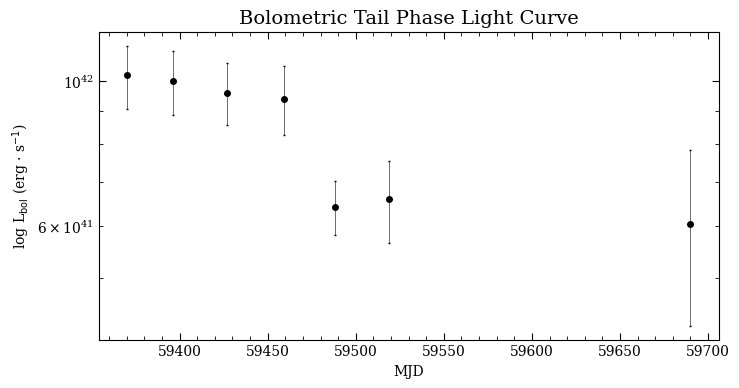

In [59]:
# Compute bolometric luminosities
Lbol, Lbol_err = Bolometric_L(unumpy.nominal_values(MbolUarr),unumpy.std_devs(MbolUarr),z)
fig, a0 = plt.subplots(figsize=(8,4))
a0.errorbar(tB_mjd,Lbol,yerr=Lbol_err,fmt='ko',ecolor='k',elinewidth=0.4,ms=4,capsize=1)
a0.set_title("Bolometric Tail Phase Light Curve",fontsize=14)
a0.set_xlabel("MJD")
a0.set_ylabel(r"log L$_{\mathrm{bol}}$ (erg $\cdot$ s$^{-1}$)")
a0.yaxis.set_minor_locator(MultipleLocator(0.02e42))
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')
a0.set_yscale('log')


We will use the bolometric corrections from Martinez et al. 2021 paper to see how the tail phase bolometric light curve compares to the early bolometric light curve. We will only use the colors that are within the effective range of the correction.

In [60]:
# Define arrays with uncertainties
mB_early = unumpy.uarray(B_early[3:],B_early_err[3:]) 
mV_early = unumpy.uarray(V_early[3:],V_early_err[3:])
color_early = mB_early - mV_early
# Define bolometric correction terms
cs = np.array([-0.740, 4.472, -9.637, 9.075,-3.290])
EarlyCorr  = lambda x: cs[0] + cs[1]*x + cs[2]*x**2 + cs[3]*x**3 + cs[4]*x**4
# Compute BC terms and bolometric magnitude within effective range of correction
EarlyTerms = [EarlyCorr(mB_early[i] - mV_early[i]) for i in range(len(unumpy.nominal_values(mB_early))) if np.logical_and(color_early[i] <= 1.16, color_early[i] >= -0.1)]
Term_Index = [i for i in range(len(unumpy.nominal_values(mB_early))) if np.logical_and(color_early[i] <= 1.16, color_early[i] >= -0.1)]
Mbol_early = EarlyTerms + mV_early[Term_Index]
# Compute bolometric luminosity
Lbol_early, Lbol_early_err = Bolometric_L(unumpy.nominal_values(Mbol_early),unumpy.std_devs(Mbol_early),z)
early_t = B_dates[3:]

In [61]:
from astropy.time import Time
# Define time of first light
t0 = B_dates[3]-0.2320
t0_err = 0.12
t_Exp = unumpy.uarray([t0],[t0_err])
t0_err_iso = t0 + 0.12
# Convert to ISO time format
t0_date = Time([t0,t0_err_iso],format='mjd')
t0_date_iso = t0_date.isot
print("Time of Explosion:",t0_date_iso[0],"(+/-)",int(t0_date_iso[1][11:13])-int(t0_date_iso[0][11:13]),"hr")

# Convert lc time to JD
tt = Time(tB_mjd,format='mjd')
tt = tt.jd
L = unumpy.uarray(Lbol,Lbol_err)
# # The model has its time in JD so we must convert it appropriately
t0j = t0_date.jd
print(tt[0]-t0j[0])
M56 = (7.866e-44)*L[0]*np.exp(((tt[0]-t0j[0])/(1+z) - 6.1)/111.26)
print("Ni-56 Mass:", M56,"Msun")

Time of Explosion: 2020-10-12T09:09:55.200 (+/-) 3 hr
235.6181111112237
Ni-56 Mass: 0.53+/-0.06 Msun


1.0205833194325547e+42 pm 1.1298742027758354e+41


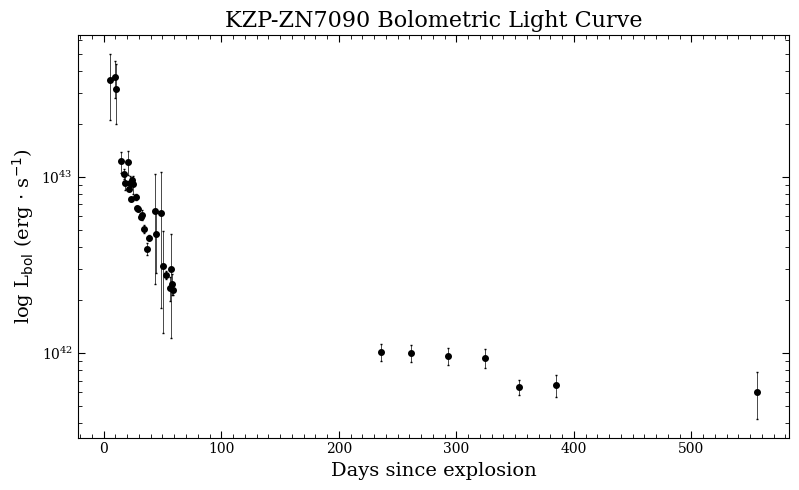

In [62]:
fig, a0 = plt.subplots(figsize=(gr*scale,scale))
a0.errorbar(early_t[Term_Index]-t0,Lbol_early,yerr=Lbol_early_err,fmt='ko',elinewidth=0.5,capsize=1,ms=4)
a0.errorbar(tB_mjd-t0,Lbol,yerr=Lbol_err,fmt='ko',elinewidth=0.5,capsize=1,ms=4)
a0.set_xlabel("Days since explosion",fontsize=14)
a0.set_ylabel(r"log L$_{\mathrm{bol}}$ (erg $\cdot$ s$^{-1}$)",fontsize=14)
a0.set_title("KZP-ZN7090 Bolometric Light Curve",fontsize=16)
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both')
a0.xaxis.set_ticks_position('both')
a0.set_yscale('log')
plt.tight_layout()
print(Lbol[-7],"pm",Lbol_err[-7])


## Compare light curve of ZN7090 with other CCSNe

In [63]:
ZN7090_B, ZN7090Berr = m2M(MB,MB_err,z)
ZN7090_V, ZN7090Verr = m2M(MV,MV_err,z)
ZN7090_I, ZN7090Ierr = m2M(MI,MI_err,z)

#################################### KSP-SN-2016 ####################################
z_sn2016= 0.043
sn16_t,mags16,mags_err16 = np.genfromtxt("KSP-SN-2016kf.txt",skip_header=18,unpack=True,usecols=[0,2,3])
bands = np.genfromtxt("KSP-SN-2016kf.txt",skip_header=18,unpack=True,usecols=[1],dtype=str)
sn16B = mags16[np.where(np.logical_and(bands=='B',mags_err16 != -99.90))]
sn16V = mags16[np.where(np.logical_and(bands=='V',mags_err16 != -99.90))]
sn16I = mags16[np.where(np.logical_and(bands=='I',mags_err16 != -99.90))]

sn16BA = m2M(sn16B,np.ones(len(sn16B)),z_sn2016)
sn16VA = m2M(sn16V,np.ones(len(sn16V)),z_sn2016)
sn16IA = m2M(sn16I,np.ones(len(sn16I)),z_sn2016)

#################################### SN-2006 ####################################
t09,B09,V09,I09 = np.genfromtxt("SN 2009ib.txt",skip_header=16,usecols=[1,4,6,8],unpack=True)
B09A = B09 - 5*np.log10(22.0e6/10)
V09A = V09 - 5*np.log10(22.0e6/10)
I09A = I09 - 5*np.log10(22.0e6/10)

#################################### SN2005ci #################################### 
z05 = 0.00758
t05, B05 = np.genfromtxt("sn2005ci.public.dat",skip_header=4,usecols=[0,1],unpack=True)
B05A, dummy = m2M(B05,np.ones(len(B05)),z05)


377.0444679735511 Mpc
377.0444679735511 Mpc
377.0444679735511 Mpc
179.60984069953403 Mpc
179.60984069953403 Mpc
179.60984069953403 Mpc
30.81038278750105 Mpc


In [64]:
# Load in sn2017 data
sn2017_Data = np.genfromtxt("sn2017faf.dat",unpack=True,skip_header=3,usecols=[0,1])
sn2017_Bands = np.genfromtxt("sn2017faf.dat",unpack=True,skip_header=3,usecols=[4],dtype=str)

B2017 = sn2017_Data[0][np.where(sn2017_Bands=="B")], sn2017_Data[1][np.where(sn2017_Bands=="B")]
V2017 = sn2017_Data[0][np.where(sn2017_Bands=="V")], sn2017_Data[1][np.where(sn2017_Bands=="V")]
I2017 = sn2017_Data[0][np.where(sn2017_Bands=="I")], sn2017_Data[1][np.where(sn2017_Bands=="I")]

B2017M = m2M(B2017[1],np.ones(len(B2017[1])),0.0225)
V2017M = m2M(V2017[1],np.ones(len(V2017[1])),0.0225)
I2017M = m2M(I2017[1],np.ones(len(I2017[1])),0.0225)

92.52687426900036 Mpc
92.52687426900036 Mpc
92.52687426900036 Mpc


In [65]:
# Peak (BVI) magnitude for SN2013df
B2013 = -16.21, 20.39
V2013 = -16.85, 21.68
I2013 = -17.17, 23.29

# Peak (BVI) magnitudes for SN1993J
B1993 = -17.23, 19.7
V1993 = -17.59, 21.0
I1993 = -17.68 , 22.0

# Peak (BVI) magnitudes for SN2008ax
B2008 = -17.32, 18.3
V2008 = -17.61, 20.1 
I2008 = -17.75, 22.4

# Peak (BVI) magniutde for SN2011dh
B2011 = -16.38, 19.6
V2011 = -17.12, 20.6
I2011 = -17.48, 22.9

In [66]:
len(B2017[0]) == len(B2017M)

False

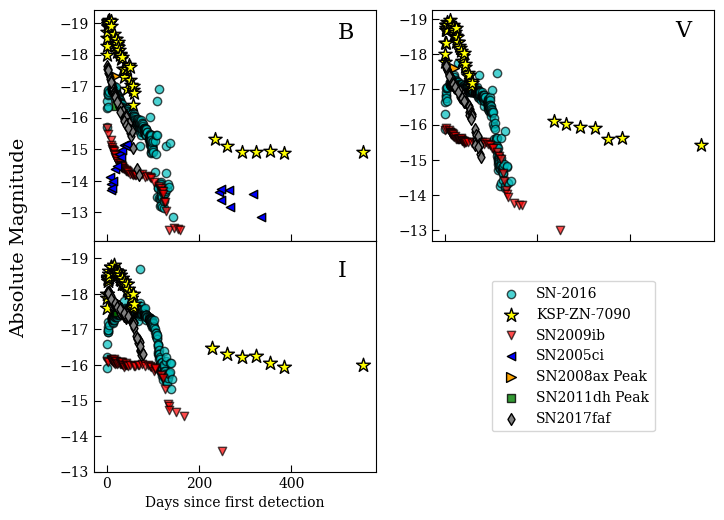

In [67]:
fig, ((a0,a1),(a2,a3)) = plt.subplots(figsize=(8,6),ncols=2,nrows=2,sharex=True)
a0.scatter(sn16_t[np.where(np.logical_and(bands=='B',mags_err16 != -99.90))]-sn16_t[np.where(np.logical_and(bands=='B',mags_err16 != -99.90))][0],sn16BA[0],c='c',edgecolors='black',alpha=0.7)
a0.scatter(tB_comp[3:]-tB_comp[3],B_abs[3:],marker='*',color='yellow',edgecolors='black',s=100)
a0.scatter(t09-t09[0],B09A,marker='v',c='r',edgecolors='k',alpha=0.7)
#a0.scatter(B2013[1],B2013[0],marker='<',c='b',edgecolors='k')
l4 = a0.scatter(t05[8:]-t05[8],B05A[8:],marker='<',c='b',edgecolors='k',label='SN2005ci')
a0.scatter(B2008[1],B2008[0],marker='>',c='orange',edgecolors='k',s=50)
a0.scatter(B2011[1],B2011[0],marker='s',c='g',edgecolors='k',alpha=0.8)
a0.scatter(B2017[0] - B2017[0][0],B2017M[0],marker='d',c='gray',edgecolors='k')
a0.text(500,-18.5,'B',fontsize=16)
a0.invert_yaxis()

a1.scatter(sn16_t[np.where(np.logical_and(bands=='V',mags_err16 != -99.90))]-sn16_t[np.where(np.logical_and(bands=='V',mags_err16 != -99.90))][0],sn16VA[0],color='c',edgecolor='k',alpha=0.7)
a1.scatter(tV_comp[3:]-tV_comp[3],V_abs[3:],marker='*',c='yellow',edgecolor='k',s=100)
a1.scatter(t09-t09[0],V09A,marker='v',c='r',edgecolors='k',alpha=0.7)
#a1.scatter(V2013[1],V2013[0],marker='<',c='b',edgecolors='k')
a1.scatter(V2008[1],V2008[0],marker='>',c='orange',edgecolors='k',s=50)
a1.scatter(V2011[1],V2011[0],marker='s',c='g',edgecolors='k',alpha=0.8)
a1.scatter(V2017[0] - V2017[0][0],V2017M[0],marker='d',c='gray',edgecolors='k')
a1.invert_yaxis()
a1.text(500,-18.5,'V',fontsize=16)

l1 = a2.scatter(sn16_t[np.where(np.logical_and(bands=='I',mags_err16 != -99.90))]-sn16_t[np.where(np.logical_and(bands=='I',mags_err16 != -99.90))][0],sn16IA[0],color='c',edgecolor='k',label='SN-2016',alpha=0.7)
l2 = a2.scatter(tI_comp[3:]-tI_comp[3],I_abs[3:],marker='*',edgecolor='k',s=110,c='yellow',label='KSP-ZN-7090')
l3 = a2.scatter(t09-t09[0],I09A,marker='v',c='r',edgecolors='k',label='SN2009ib',alpha=0.7)
#l4 = a2.scatter(I2013[1],I2013[0],marker='<',c='b',edgecolors='k',label='SN2013df Peak')
l5 = a2.scatter(I2008[1],I2008[0],marker='>',c='orange',edgecolors='k',label="SN2008ax Peak",s=50)
l6 = a2.scatter(I2011[1],I2011[0],marker='s',c='g',edgecolors='k',alpha=0.8,label='SN2011dh Peak')
l7 = a2.scatter(I2017[0] - I2017[0][0],I2017M[0],marker='d',c='gray',edgecolors='k',label='SN2017faf')
a2.invert_yaxis()
a2.set_xlabel("Days since first detection")
a2.set_ylim([-13,-19.5])
a2.text(500,-18.5,'I',fontsize=16)
a3.axis('off')
a3.legend(loc='center',handles=[l1,l2,l3,l4,l5,l6,l7])


fig.supylabel("Absolute Magnitude",fontsize=14)
plt.subplots_adjust(hspace=0)




\href{https://www.astronomy.ohio-state.edu/asassn/transients.html}{ASASSN-15fz}

<h2 align='center'> Can the spectrum of the tail phase explain such high Ni56 Mass?<h2>

In [68]:
# waveR, fluxR = np.genfromtxt('GS20210715_R400_770_790.dat',unpack=True,skip_header=70)
waveR, fluxR = np.genfromtxt('GS20210715_Calibrated.dat',unpack=True,skip_header=70)
waveB, fluxB = np.genfromtxt('GS20220703_Calibrated.dat',unpack=True,skip_header=70)
waveE, fluxE = np.loadtxt("Early_Spec.txt",unpack=True,skiprows=1,dtype=float,delimiter=',')
waveG, fluxG = np.genfromtxt("Possible_Host.dat",unpack=True,skip_header=70)


In [124]:
NaI = 6481
FeII1 = 4924
FeII2 = 5018
Ha = 6562.79
Hb = 4861.35
NaI = 5892
CaII = 8498

In [70]:
Nice_Plots()

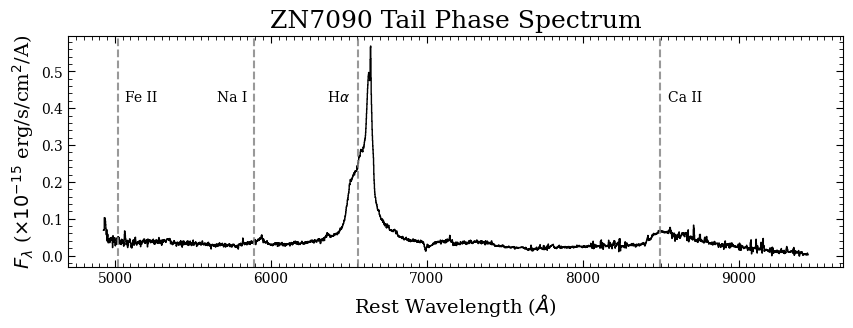

In [71]:
# Define source redshift
z = 0.08739904944703399
# Define partner galaxt redshift 
zG = 0.0991

fig, a0 = plt.subplots(figsize=(10,3))
a0.step(waveR/(1+z),fluxR,c='k',linewidth=1)
a0.set_ylabel(r"$F_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/A)",fontsize=14)
a0.set_xlabel(r"Rest Wavelength ($\AA$)",fontsize=14)
a0.set_title("ZN7090 Tail Phase Spectrum",fontsize=18)
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_minor_locator(MultipleLocator(0.02))
a0.text(Ha-200,0.42,r"H$\alpha$")
a0.text(NaI-240,0.42,"Na I")
a0.text(FeII2+50,0.42,"Fe II")
a0.text(CaII+50,0.42,"Ca II")
a0.axvline(x=NaI,ls='--',c='gray',alpha=0.8)
a0.axvline(x=CaII,ls='--',c='gray',alpha=0.8)
a0.axvline(x=Ha,ls='--',c='gray',alpha=0.8)
a0.axvline(x=FeII2,ls='--',c='gray',alpha=0.8)
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
plt.show()
#plt.tight_layout()

In [72]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

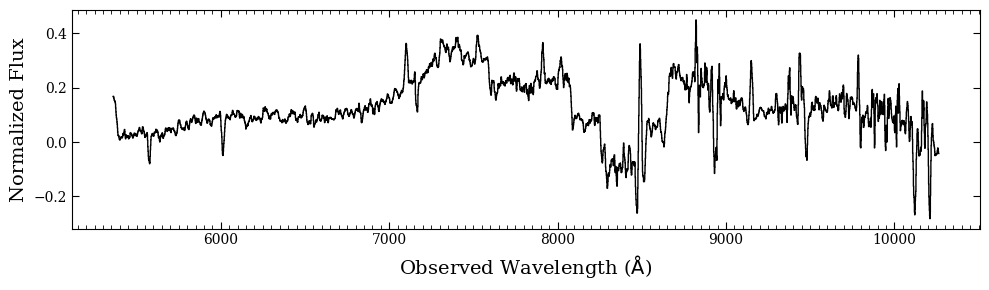

In [73]:
fluxG_avg = moving_average(fluxG,10)
waveG_avg = moving_average(waveG,10) 

fig, a0 = plt.subplots(figsize=(10,3))
#a0.step(waveG,fluxG/np.max(fluxG),linewidth=1,color='k',alpha=0.3)
a0.step(waveG_avg,fluxG_avg/np.max(fluxG),c='k',linewidth=1)
a0.set_ylabel(r"Normalized Flux",fontsize=14)
a0.set_xlabel(r"Observed Wavelength ($\rm \AA$)",fontsize=14)
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
plt.tight_layout()
plt.savefig("Plots/PossileHost.pdf")
plt.show()

0.08739904944703399


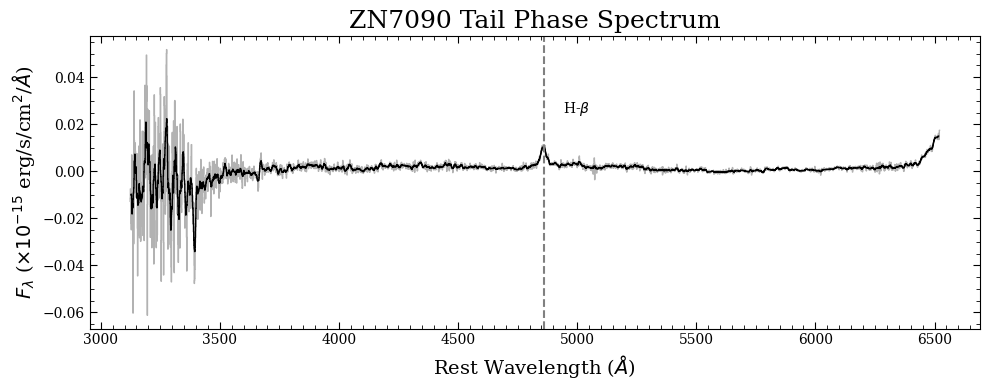

In [103]:
FeII_L = 4924
zhost_paper = 0.0998
zsn_paper = 0.0898
fluxB_avg = moving_average(fluxB,10)
waveB_avg = moving_average(waveB,10)
fig, a0 = plt.subplots(figsize=(10,4))
a0.step(waveB/(1+zhost_paper),fluxB,linewidth=1,color='k',alpha=0.3)
a0.step(waveB_avg/(1+zhost_paper),fluxB_avg,c='k',linewidth=1)
a0.set_ylabel(r"$F_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\AA$)",fontsize=14)
a0.set_xlabel(r"Rest Wavelength ($\AA$)",fontsize=14)
a0.set_title("ZN7090 Tail Phase Spectrum",fontsize=18)
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_minor_locator(MultipleLocator(0.005))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.axvline(x=Hb,ls='--',c='gray')
a0.text(x=4940,y=0.025,s=r"H-$\beta$")
plt.tight_layout()
print(z)

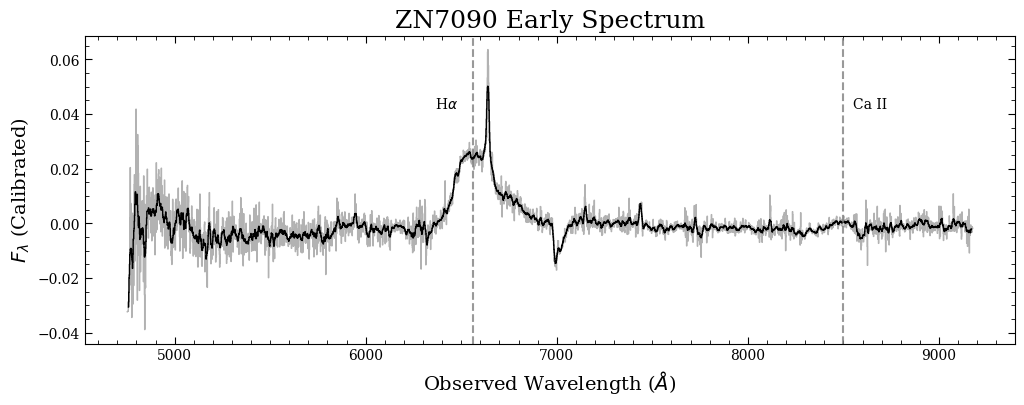

In [75]:
fluxE_avg = moving_average(fluxE,10)
waveE_avg = moving_average(waveE,10)
fig, a0 = plt.subplots(figsize=(12,4))
a0.step(waveE/(1+z),fluxE,c='k',linewidth=1,alpha=0.3)
a0.step(waveE_avg/(1+z),fluxE_avg,c='k',linewidth=1)
a0.set_ylabel(r"$F_{\lambda}$ (Calibrated)",fontsize=14)
a0.set_xlabel(r"Observed Wavelength ($\AA$)",fontsize=14)
a0.set_title("ZN7090 Early Spectrum",fontsize=18)
a0.xaxis.set_minor_locator(MultipleLocator(100))
a0.yaxis.set_minor_locator(MultipleLocator(0.005))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.axvline(x=CaII,ls='--',c='gray',alpha=0.8)
a0.axvline(x=Ha,ls='--',c='gray',alpha=0.8)
# a0.axvline(x=5889,ls='--',c='gray',alpha=0.8)
# a0.axvline(x=5895,ls='--',c='gray',alpha=0.8)
a0.text(Ha-200,0.042,r"H$\alpha$")
a0.text(CaII+50,0.042,"Ca II")
# a0.set_xlim([5500,6000])
plt.show()


In [76]:
t0_s = 59206.0646209768
t1_s = 59410.2326311945
t2_s = 59763.1565318702

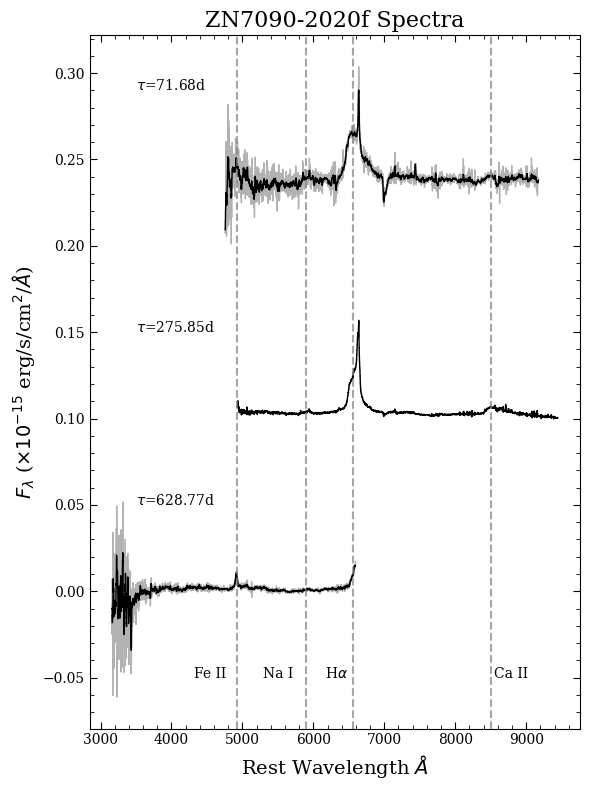

In [77]:
c1 = 0.24
c2 = 0.1
fig, a0 = plt.subplots(figsize=(6,8))
a0.set_title("ZN7090-2020f Spectra",fontsize=16)
a0.set_xlabel(r"Rest Wavelength $\AA$",fontsize=14)
a0.set_ylabel(r"$F_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\AA$)",fontsize=14)

a0.step(waveR/(1+z),fluxR/10+c2,c='k',linewidth=1)
a0.step(waveB/(1+z),fluxB,c='k',linewidth=1,alpha=0.3)
a0.step(waveE/(1+z),fluxE+c1,c='k',linewidth=1,alpha=0.3)
a0.step(waveE_avg/(1+z),fluxE_avg+c1,c='k',linewidth=1)
a0.step(waveB_avg/(1+z),fluxB_avg,c='k',linewidth=1)

a0.xaxis.set_minor_locator(MultipleLocator(200))
a0.yaxis.set_minor_locator(MultipleLocator(0.01))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')

a0.text(Ha-400,-0.05,r"H$\alpha$")
a0.text(NaI-600,-0.05,"Na I")
a0.text(FeII1-600,-0.05,"Fe II")
a0.text(CaII+50,-0.05,"Ca II")
a0.axvline(x=NaI,ls='--',c='gray',alpha=0.7)
a0.axvline(x=CaII,ls='--',c='gray',alpha=0.7)
a0.axvline(x=Ha,ls='--',c='gray',alpha=0.7)
a0.axvline(x=FeII1,ls='--',c='gray',alpha=0.7)

a0.text(3500,0.29,rf"$\tau$={round(t0_s-t0,2)}d")
a0.text(3500,0.15,rf"$\tau$={round(t1_s-t0,2)}d")
a0.text(3500,0.05,rf"$\tau$={round(t2_s-t0,2)}d")
plt.tight_layout()
plt.savefig("Plots/ZN7090Spectra.pdf")


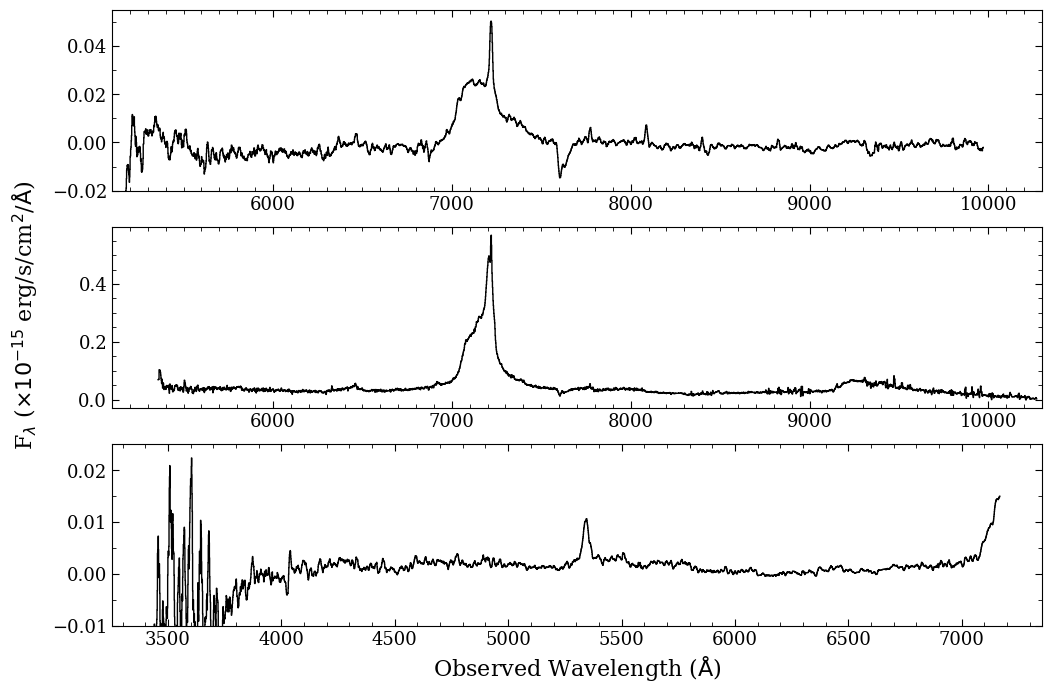

In [78]:
# Create plots for paper
# fig, (a1,a2,a3) = plt.subplots(figsize=(10,8),nrows=3)
fig = plt.figure(figsize=(12,8))

a1 = plt.subplot(311)
a2 = plt.subplot(312,sharex=a1)
a3 = plt.subplot(313)

a1.step(waveE_avg,fluxE_avg,linewidth=1,c='k')
a1.yaxis.set_minor_locator(MultipleLocator(0.01))
a1.yaxis.set_ticks_position('both') 
a1.xaxis.set_ticks_position('both')
a1.set_ylim([-0.02,0.055])
a1.tick_params(axis='both',labelsize=13)

a2.step(waveR,fluxR,c='k',linewidth=1)
a2.xaxis.set_minor_locator(MultipleLocator(100))
a2.yaxis.set_minor_locator(MultipleLocator(0.05))
a2.yaxis.set_ticks_position('both') 
a2.xaxis.set_ticks_position('both')
a2.set_xlim([5100,10300])
a2.tick_params(axis='both',labelsize=13)

a3.step(waveB_avg,fluxB_avg,c='k',linewidth=1)
a3.xaxis.set_minor_locator(MultipleLocator(100))
a3.yaxis.set_minor_locator(MultipleLocator(0.005))
a3.yaxis.set_ticks_position('both') 
a3.xaxis.set_ticks_position('both')
a3.set_ylim([-0.01,0.025])
a3.tick_params(axis='both',labelsize=13)
a3.set_xlabel(r"Observed Wavelength ($\rm \AA$)",fontsize=16)
fig.text(0.04, 0.5, r'F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\rm\AA$) ', va='center', rotation='vertical',fontsize=16)
plt.savefig("Plots/All_spec.pdf")



### Fit double lorentzian to broad feature on second spectra

In [125]:
# Fit Lorentzian to H-alpha profile
# Slice profie 
Swave = waveR[np.where(np.logical_and(waveR>6900,waveR<7500))]
Sflux = fluxR[np.where(np.logical_and(waveR>6900,waveR<7500))]

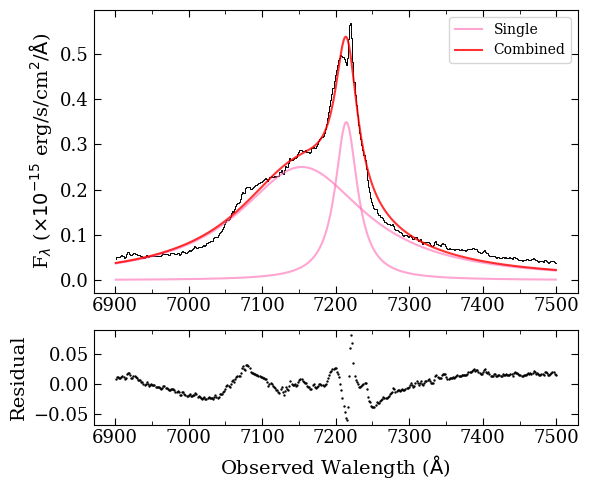

In [126]:
from scipy.optimize import curve_fit
from Helpers import chi_square_reduced
# Define the Lorentzian function
def lorentzian(x, x0, gamma, A):
    return A * gamma**2 / ((x - x0)**2 + gamma**2)

# Define the sum of two Lorentzians
def double_lorentzian(x, x1, gamma1, A1, x2, gamma2, A2):
    return lorentzian(x, x1, gamma1, A1) + lorentzian(x, x2, gamma2, A2)
p0L = [7150,100,0.5,7220,40,0.7]

popt,pcov = curve_fit(double_lorentzian,Swave,Sflux,p0=p0L)

fig, (a0,a1) = plt.subplots(figsize=(6,5),nrows=2,gridspec_kw={'height_ratios': [3, 1]})
a0.step(Swave,Sflux,c='k',linewidth=0.7)
a0.plot(Swave,lorentzian(Swave,popt[0],popt[1],popt[2]),c='hotpink',alpha=0.6,label='Single')
a0.plot(Swave,lorentzian(Swave,popt[3],popt[4],popt[5]),c='hotpink',alpha=0.6)
a0.plot(Swave,double_lorentzian(Swave,*popt),c='r',alpha=0.8,label='Combined')
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\rm\AA$)",fontsize=14)
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.legend()
a0.tick_params(axis='both',labelsize=13)

a1.scatter(Swave,Sflux-double_lorentzian(Swave,*popt),c='k',s=0.5)
a1.set_ylabel("Residual",fontsize=14)
a1.set_xlabel(r"Observed Walength ($\rm\AA$)",fontsize=14)
a1.tick_params(axis='both',labelsize=13)
a1.xaxis.set_minor_locator(MultipleLocator(50))
a1.yaxis.set_ticks_position('both') 
a1.xaxis.set_ticks_position('both')

# fig.text(0.04, 0.5, r'F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\AA$) ', va='center', rotation='vertical',fontsize=14)
# plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.savefig("Plots/SpecLorentzFit02.pdf")
plt.show()

<Axes: ylabel='Count'>

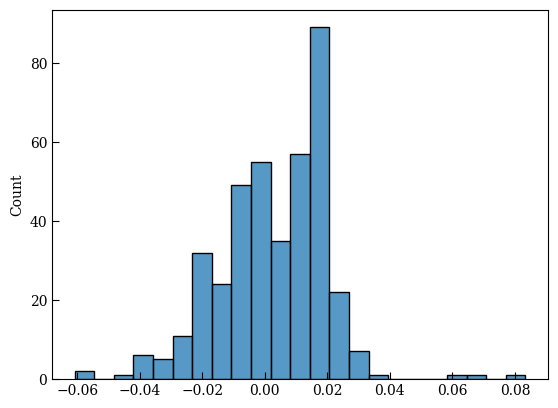

In [81]:
import seaborn as sns
sns.histplot(Sflux-double_lorentzian(Swave,*popt),bins='fd')

FWHM of Lorentzian is = $2\gamma$

In [120]:
# Gamma1 fits the broad feature
x0B, GammaB, AB = popt[0], popt[1], popt[2]
x0N, GammaN, AN = popt[3], popt[4], popt[5]
FWHM = GammaB*2
print("#"*40)
print("Broad H-alpha Feature Fit Patameters")
print("#"*40)
print("x0:",x0B,"(+/-)",np.sqrt(np.diag(pcov)[0]))
print('Gamma:',GammaB,"(+/-)",np.sqrt(np.diag(pcov)[1]))
print("Amplitude:",AB,"(+/-)",np.sqrt(np.diag(pcov)[2]))
print("#"*40)
print("Narrow H-alpha Feature Fit Parameters")
print("#"*40)
print("x0:",x0N,"(+/-)",np.sqrt(np.diag(pcov)[3]))
print('Gamma:',GammaN,"(+/-)",np.sqrt(np.diag(pcov)[4]))
print("Amplitude:",AN,"(+/-)",np.sqrt(np.diag(pcov)[5]))

# Calculate velocity of Ha feature of 2nd spectrum
import astropy.units as u
from astropy.constants import c
from uncertainties import ufloat

fwhm = ufloat(popt[1]*2,np.sqrt(np.diag(pcov)[1])*2)
xob = ufloat(x0B,np.sqrt(np.diag(pcov)[0]))
v = (fwhm/xob)*c
print("#"*40)
print("Velocity",v.to(u.km/u.s))
print("#"*40)

# Calculate redshift from broad Ha feature
zSN_tail = (xob - Ha)/Ha
print("Redshift Broad Ha",zSN_tail) 

# Calculate redshift from underlying host
xonHost = ufloat(x0N,np.sqrt(np.diag(pcov)[3]))
zHost_tail = (xonHost - Ha)/Ha
print("Redshift Narrow Ha,",zHost_tail)


########################################
Broad H-alpha Feature Fit Patameters
########################################
x0: 7153.846226018486 (+/-) 1.8030593015498946
Gamma: 105.44344283021033 (+/-) 1.5791470020288867
Amplitude: 0.25021434439934215 (+/-) 0.004275398654237698
########################################
Narrow H-alpha Feature Fit Parameters
########################################
x0: 7214.458998492418 (+/-) 0.3135426720706197
Gamma: 18.310111332644688 (+/-) 0.6925659933609025
Amplitude: 0.3495424970115244 (+/-) 0.006586739252383996
########################################
Velocity (8.84+/-0.13)e+03 km / s
########################################
Redshift Broad Ha 0.09006+/-0.00027
Redshift Narrow Ha, 0.09930+/-0.00005


**Double Lorentzian on CaII Feature**

[9.25182333e+03 7.34676369e+01 3.66242313e-02 9.43209710e+03
 1.18596942e+02 2.42198393e-02]


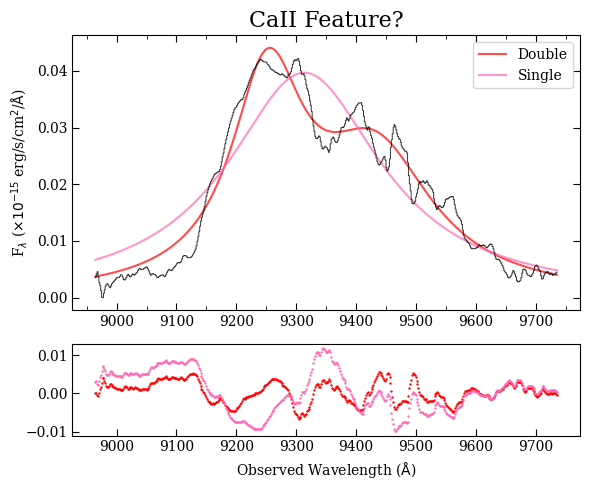

In [83]:
CAWave = waveR[np.where(np.logical_and(waveR>8950,waveR<9750))]
CAflux = fluxR[np.where(np.logical_and(waveR>8950,waveR<9750))]

Aflux = moving_average(CAflux,20)
AWave = moving_average(CAWave,20)

# Add min 
Aflux = Aflux - np.min(Aflux) 
p0 = [9240,100,0.04,9400,50,0.02]
popt1,pcov1 = curve_fit(lorentzian,AWave,Aflux,p0=p0[:3])
popt,pcov = curve_fit(double_lorentzian,AWave,Aflux,p0=p0)
print(popt)
fig, (a0,a1) = plt.subplots(figsize=(6,5),nrows=2,gridspec_kw={'height_ratios': [3, 1]})
a0.plot(AWave,double_lorentzian(AWave,*popt),c='r',alpha=0.7,label='Double')
a0.plot(AWave,lorentzian(AWave,*popt1),c='hotpink',alpha=0.7,label='Single')
a0.step(AWave,Aflux,c='k',alpha=0.8,linewidth=0.7)
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\rm\AA$)")
a1.set_xlabel(r"Observed Wavelength ($\rm\AA$)")
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.set_title("CaII Feature?",fontsize=16)
a0.legend()

a1.scatter(AWave, double_lorentzian(AWave,*popt) - Aflux,c='r',s=0.5)
a1.scatter(AWave, lorentzian(AWave,*popt1) - Aflux, c='hotpink',s=0.5)



plt.tight_layout()
plt.show()

In [84]:
FWHM = 2*ufloat(popt[1],np.sqrt(np.diag(pcov)[1]))
xob = ufloat(popt[0],np.sqrt(np.diag(pcov)[1]))
v = (FWHM/xob)*c
v.to(u.km/u.s)
print(popt[2],np.sqrt(np.diag(pcov)[2]))

0.03662423133589965 0.0006596908052573302


**Double Lorentzian on Spec: 1**

In [106]:
SEwave = waveE_avg[np.where(np.logical_and(waveE_avg>6800,waveE_avg<7550))]
SEflux = fluxE_avg[np.where(np.logical_and(waveE_avg>6800,waveE_avg<7550))]

**Double Lorenztian on Broad Ha Profile 1st Spectra**

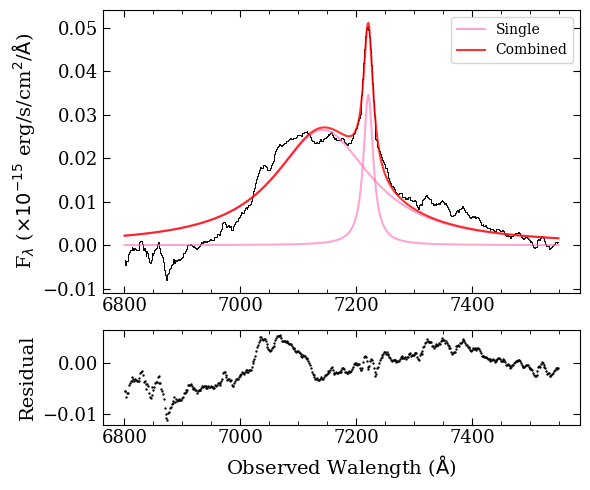

In [127]:
p0L2 = [7150,100,0.5,7250,30,0.7]

popt,pcov = curve_fit(double_lorentzian,SEwave,SEflux,p0=p0L2,maxfev=2000)

fig, (a0,a1) = plt.subplots(figsize=(6,5),nrows=2,gridspec_kw={'height_ratios': [3, 1]})
a0.step(SEwave,SEflux,c='k',linewidth=0.7)
a0.plot(SEwave,lorentzian(SEwave,popt[0],popt[1],popt[2]),c='hotpink',alpha=0.6,label='Single')
a0.plot(SEwave,lorentzian(SEwave,popt[3],popt[4],popt[5]),c='hotpink',alpha=0.6)
a0.plot(SEwave,double_lorentzian(SEwave,*popt),c='r',alpha=0.8,label='Combined')
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\rm\AA$)",fontsize=14)
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.tick_params(axis='both',labelsize=13)
a0.legend()

a1.scatter(SEwave,SEflux-double_lorentzian(SEwave,*popt),c='k',s=0.5)
a1.set_ylabel("Residual",fontsize=14)
a1.set_xlabel(r"Observed Walength ($\rm\AA$)",fontsize=14)
a1.xaxis.set_minor_locator(MultipleLocator(50))
a1.yaxis.set_ticks_position('both') 
a1.xaxis.set_ticks_position('both')
a1.tick_params(axis='both',labelsize=13)

plt.tight_layout()
plt.savefig("Plots/SpecLorentzFit01.pdf")
plt.show()

<Axes: ylabel='Count'>

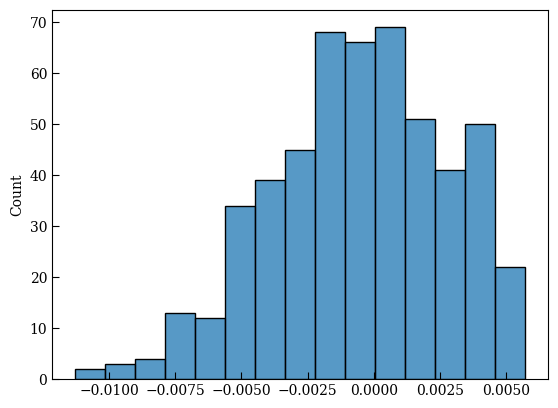

In [87]:
sns.histplot(SEflux-double_lorentzian(SEwave,*popt),bins='fd')

In [128]:
# Gamma1 fits the broad feature
x0B, GammaB, AB = popt[0], popt[1], popt[2]
x0N, GammaN, AN = popt[3], popt[4], popt[5]
FWHM = GammaB*2
print("#"*40)
print("H-alpha Feature Fit Patameters")
print("#"*40)
print("x0:",x0B,"(+/-)",np.sqrt(np.diag(pcov)[0]))
print('Gamma:',GammaB,"(+/-)",np.sqrt(np.diag(pcov)[1]))
print("Amplitude:",AB,"(+/-)",np.sqrt(np.diag(pcov)[2]))
print("#"*40)
print("Narrow H-alpha Feature Fit Parameters")
print("#"*40)
print("x0:",x0N,"(+/-)",np.sqrt(np.diag(pcov)[3]))
print('Gamma:',GammaN,"(+/-)",np.sqrt(np.diag(pcov)[4]))
print("Amplitude:",AN,"(+/-)",np.sqrt(np.diag(pcov)[5]))


import astropy.units as u
from astropy.constants import c
from uncertainties import ufloat
fwhm = ufloat(popt[1]*2,np.sqrt(np.diag(pcov)[1]))
xob = ufloat(x0B,np.sqrt(np.diag(pcov)[0]))
v = (fwhm/xob)*c
print("#"*40)
print("Broad Ha Velocity",v.to(u.km/u.s))
print("#"*40)

# Calculate redshift from broad Ha feature
zSN_early = (xob - Ha)/Ha
print("Broad Ha Redshift:",zSN_early) 


# Calculate redshift from narrow Ha feature
xon = ufloat(x0N,np.sqrt(np.diag(pcov)[3]))
zHost_early = (xon - Ha)/Ha
print("Narrow Ha Redshift:",zHost_early)
print("#"*40)

# Average redshifts from both spectra
z_final = (zSN_early + zSN_tail)/2
print("Average SN Redshift:",z_final)
print("Average Host Redshift:",(zHost_tail+zHost_early)/2)

########################################
H-alpha Feature Fit Patameters
########################################
x0: 7142.238669554983 (+/-) 2.4882780906857067
Gamma: 101.75247009812576 (+/-) 2.7819491257576043
Amplitude: 0.026511989905618923 (+/-) 0.0005198121563656649
########################################
Narrow H-alpha Feature Fit Parameters
########################################
x0: 7220.950904892471 (+/-) 0.44334291700972966
Gamma: 10.137811448777043 (+/-) 0.7981383780903808
Amplitude: 0.03463438272595094 (+/-) 0.001525748481909346
########################################
Broad Ha Velocity (8.54+/-0.12)e+03 km / s
########################################
Broad Ha Redshift: 0.0883+/-0.0004
Narrow Ha Redshift: 0.10029+/-0.00007
########################################
Average SN Redshift: 0.08918+/-0.00023
Average Host Redshift: 0.09979+/-0.00004


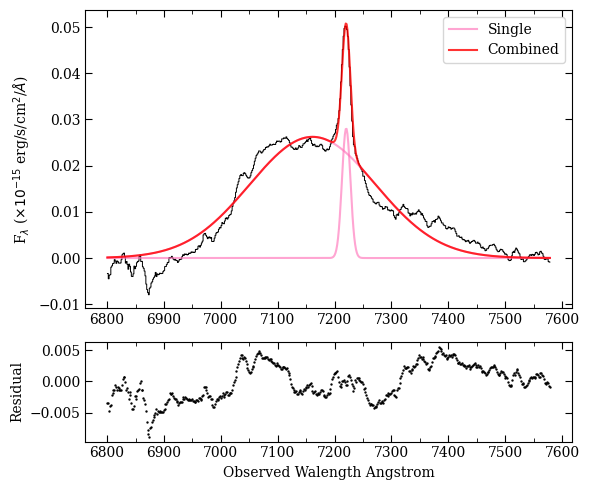

In [89]:
# Try double guassian fit on near peak specturm
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))
def double_gaussian(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gaussian(x, mu1, sigma1, A1) + gaussian(x, mu2, sigma2, A2)

p0G = [7150,20,0.05,7250,10,0.07]

popt,pcov = curve_fit(double_gaussian,SEwave,SEflux,p0=p0G,maxfev=2000)

fig, (a0,a1) = plt.subplots(figsize=(6,5),nrows=2,gridspec_kw={'height_ratios': [3, 1]})
a0.step(SEwave,SEflux,c='k',linewidth=0.7)
a0.plot(SEwave,gaussian(SEwave,popt[0],popt[1],popt[2]),c='hotpink',alpha=0.6,label='Single')
a0.plot(SEwave,gaussian(SEwave,popt[3],popt[4],popt[5]),c='hotpink',alpha=0.6)
a0.plot(SEwave,double_gaussian(SEwave,*popt),c='r',alpha=0.8,label='Combined')
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\AA$)")
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.legend()

a1.scatter(SEwave,SEflux-double_gaussian(SEwave,*popt),c='k',s=0.5)
a1.set_ylabel("Residual")
a1.set_xlabel(r"Observed Walength Angstrom")
a1.xaxis.set_minor_locator(MultipleLocator(50))
a1.yaxis.set_ticks_position('both') 
a1.xaxis.set_ticks_position('both')

plt.tight_layout()
plt.savefig("Plots/SpecGaussFit01.pdf")
plt.show()


**Ca-II on first spectrum**

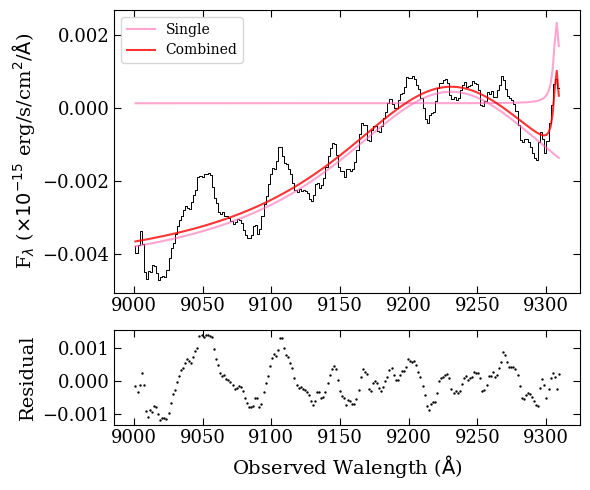

array([ 9.23074000e+03,  1.06387962e+02,  5.14677761e-03, -4.69531350e-03,
        9.30758059e+03,  2.47928429e+00,  2.20631284e-03,  1.35145169e-04])

In [90]:
# Define the Lorentzian function
def lorentzian(x, x0, gamma, A, C):
    return A * gamma**2 / ((x - x0)**2 + gamma**2) + C

# Define the sum of two Lorentzians
def double_lorentzian(x, x1, gamma1, A1, C1, x2, gamma2, A2, C2):
    return lorentzian(x, x1, gamma1, A1, C1) + lorentzian(x, x2, gamma2, A2, C2)

SEwave = waveE_avg[np.where(np.logical_and(waveE_avg>9000,waveE_avg<9310))]
SEflux = fluxE_avg[np.where(np.logical_and(waveE_avg>9000,waveE_avg<9310))]

p0L2 = [9250,70,0.004,-0.004,9350,20,-0.02,0.001]

popt,pcov = curve_fit(double_lorentzian,SEwave,SEflux,p0=p0L2,maxfev=2000)

fig, (a0,a1) = plt.subplots(figsize=(6,5),nrows=2,gridspec_kw={'height_ratios': [3, 1]})
a0.step(SEwave,SEflux,c='k',linewidth=0.7)
a0.plot(SEwave,lorentzian(SEwave,popt[0],popt[1],popt[2],popt[3]),c='hotpink',alpha=0.6,label='Single')
a0.plot(SEwave,lorentzian(SEwave,popt[4],popt[5],popt[6],popt[7]),c='hotpink',alpha=0.6)
a0.plot(SEwave,double_lorentzian(SEwave,*popt),c='r',alpha=0.8,label='Combined')
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\rm\AA$)",fontsize=14)
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.tick_params(axis='both',labelsize=13)
a0.legend()

a1.scatter(SEwave,SEflux-double_lorentzian(SEwave,*popt),c='k',s=0.5)
a1.set_ylabel("Residual",fontsize=14)
a1.set_xlabel(r"Observed Walength ($\rm\AA$)",fontsize=14)
a1.xaxis.set_minor_locator(MultipleLocator(50))
a1.yaxis.set_ticks_position('both') 
a1.xaxis.set_ticks_position('both')
a1.tick_params(axis='both',labelsize=13)
plt.tight_layout()
plt.show()

popt

In [91]:
print(popt[1],np.sqrt(np.diag(pcov)[1]))
x0 = ufloat(popt[0],np.sqrt(np.diag(pcov)[0]))
fwhm = ufloat(popt[1]*2,np.sqrt(np.diag(pcov)[1])*2)
v = (fwhm/xob)*c
v.to(u.km/u.s)

106.3879618987655 8.046967542463706


<Quantity 8833.820784175125+/-668.1723250056831 km / s>

**Potential NaI Doublet Feature**

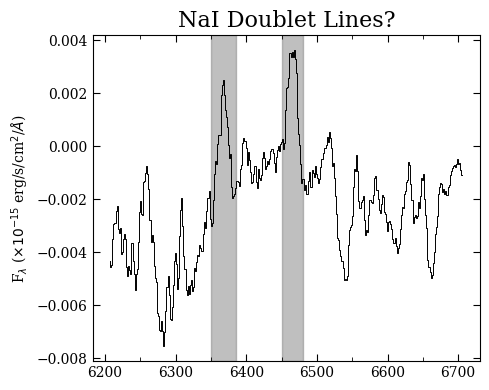

In [92]:
# Fit sodium feature with lorentzian
NAwave = waveE_avg[np.where(np.logical_and(waveE>6200,waveE<6700))]
NAflux = fluxE_avg[np.where(np.logical_and(waveE>6200,waveE<6700))]

fig, (a0) = plt.subplots(figsize=(5,4))
a0.step(NAwave ,NAflux,c='k',linewidth=0.7)
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\AA$)")
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.set_title("NaI Doublet Lines?",fontsize=16)
a0.axvspan(6350,6385,color='gray',alpha=0.5)
a0.axvspan(6450,6480,color='gray',alpha=0.5)


plt.tight_layout()
plt.show()


It is not a doublet because the wavelengths do not match after correcting the observerd wavelength to rest wavelength with a redshift of 0.08931+/-0.00023.

**Potential CaII Broad Feature** 

In [93]:
CAwave = waveE_avg[np.where(np.logical_and(waveE>9050,waveE<9325))]
CAflux = fluxE_avg[np.where(np.logical_and(waveE>9050,waveE<9325))]
Aflux = moving_average(CAflux,20)
AWave = moving_average(CAwave,20)

# Add min 
Aflux = Aflux - np.min(Aflux)

p0 = [9240,100,0.01]
popt,pcov = curve_fit(lorentzian,AWave,Aflux,p0)
print(popt)
fig, (a0) = plt.subplots(figsize=(5,4))
a0.plot(AWave,lorentzian(AWave,*popt),c='r')
a0.step(AWave,Aflux,c='k',alpha=0.8,linewidth=0.7)
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\AA$)")
a0.xaxis.set_minor_locator(MultipleLocator(50))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.set_title("CaII Feature?",fontsize=16)



plt.tight_layout()
plt.show()

TypeError: lorentzian() missing 1 required positional argument: 'C'

In [ ]:
FWHM = 2*ufloat(popt[1],np.sqrt(np.diag(pcov)[1]))
xob = ufloat(popt[0],np.sqrt(np.diag(pcov)[1]))
v = (FWHM/xob)*c
v.to(u.km/u.s)
xob

9235.773155445791+/-1.7555837604821505

**FeII narrow feature on 3rd spectrum**

[5.34413287e+03 2.10126830e+01 1.02631418e-02]


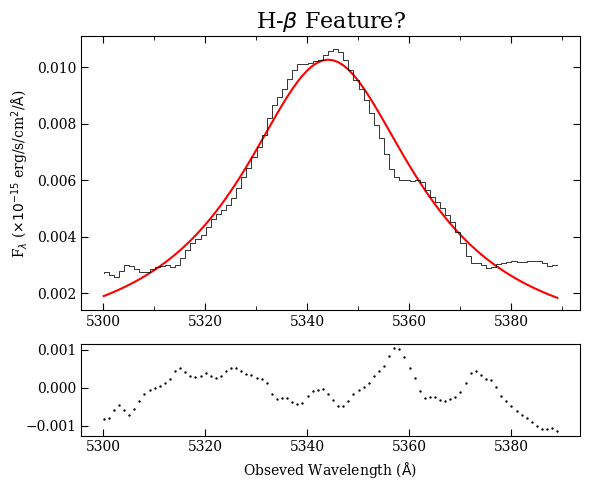

In [ ]:
SBWave = waveB_avg[np.logical_and(waveB_avg > 5300, waveB_avg < 5390)]
SBflux = fluxB_avg[np.logical_and(waveB_avg > 5300, waveB_avg < 5390)]

# Add min 
Aflux = Aflux - np.min(Aflux)

p0 = [5340,10,1]
popt,pcov = curve_fit(lorentzian,SBWave,SBflux,p0)
print(popt)
fig, (a0,a1) = plt.subplots(figsize=(6,5),nrows=2,gridspec_kw={'height_ratios':[3,1]})
a0.plot(SBWave,lorentzian(SBWave,*popt),c='r')
a0.step(SBWave,SBflux,c='k',alpha=0.8,linewidth=0.7)
a0.set_ylabel(r"F$_{\lambda}$ ($\times 10^{-15}$ erg/s/cm$^2$/$\rm\AA$)")
a1.set_xlabel(r"Obseved Wavelength ($\rm\AA$)")
a0.xaxis.set_minor_locator(MultipleLocator(10))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
a0.set_title(r"H-$\beta$ Feature?",fontsize=16)

a1.scatter(SBWave, lorentzian(SBWave,*popt) - SBflux, c='k',s=0.5)
plt.tight_layout()
plt.show()

In [ ]:
x0N, GammaN, AN = popt[0], popt[1], popt[2]
FWHM = GammaB*2
print("#"*40)
print("Narrow H-Beta Feature Fit Patameters")
print("#"*40)
print("x0:",x0N,"(+/-)",np.sqrt(np.diag(pcov)[0]))
print('Gamma:',GammaN,"(+/-)",np.sqrt(np.diag(pcov)[1]))
print("Amplitude:",AN,"(+/-)",np.sqrt(np.diag(pcov)[2]))

########################################
Narrow H-Beta Feature Fit Patameters
########################################
x0: 5344.132868788353 (+/-) 0.255431670611246
Gamma: 21.012682976006396 (+/-) 0.40717832971881396
Amplitude: 0.010263141761119665 (+/-) 0.00012660424792289925


In [ ]:
FWHM = 2*ufloat(popt[1],np.sqrt(np.diag(pcov)[1]))
xob = ufloat(popt[0],np.sqrt(np.diag(pcov)[1]))
v = (FWHM/xob)*c
v.to(u.km/u.s)
xob

5344.132868788353+/-0.40717832971881396

**Look at spectrums in rest frame assuming z=0.08931**

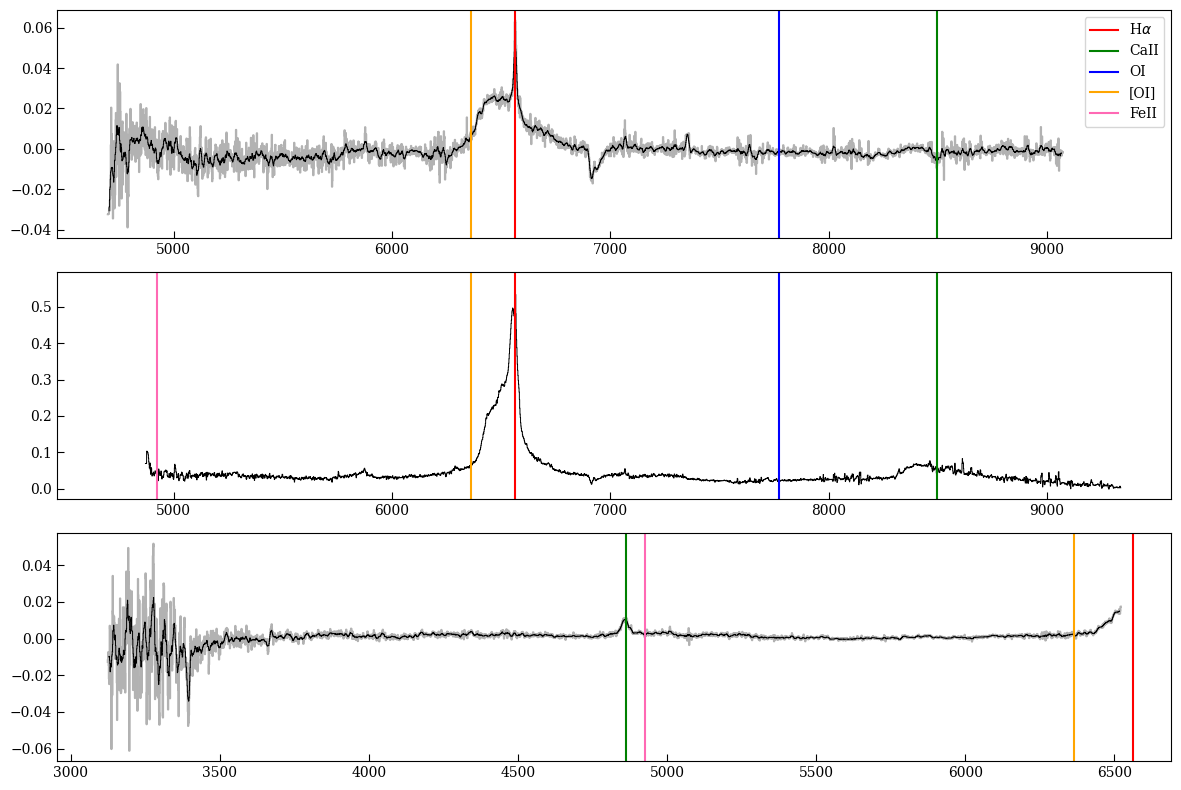

In [131]:
# Define redshift for respective source
#z_final = 0.08918 # For SN
z_final = 0.09979 # For host
# Correct first spectrum
waveE_avg_z = waveE_avg/(1+z_final)
waveE_z = waveE/(1+z_final)

# Correct second spectrum
waveR_z = waveR/(1+z_final)

# Correct third spectrum
waveB_avg_z = waveB_avg/(1+z_final)
waveB_z = waveB/(1+z_final)

fig = plt.figure(figsize=(12,8))

a0 = plt.subplot(311)
a1 = plt.subplot(312,sharex=a0)
a2 = plt.subplot(313)


a0.step(waveE_avg_z,fluxE_avg,c='k',linewidth=0.7)
a0.step(waveE_z,fluxE,c='k',alpha=0.3)
l1 = a0.axvline(x=6563,c='r',label=r'H$\alpha$') # Ha
l2 = a0.axvline(x=8498,c='g',label="CaII") # CaII
l3 = a0.axvline(x=7774,c='b',label='OI') # OI
l4 = a0.axvline(x=6364,c='orange',label='[OI]') # Another OI?
a0.legend()

a1.step(waveR_z,fluxR,c='k',linewidth=0.7)
a1.axvline(x=6563,c='r') 
a1.axvline(x=8498,c='g') 
a1.axvline(x=7774,c='b') 
a1.axvline(x=6364,c='orange')
a1.axvline(x=4924,c='hotpink')

a2.step(waveB_avg_z,fluxB_avg,c='k',linewidth=0.7)
a2.step(waveB_z,fluxB,c='k',alpha=0.3)
a2.axvline(x=6563,c='r') 
l5 = a2.axvline(x=4924,c='hotpink',label='FeII')
l6 = a2.axvline(x=4861,c='g',label=r'H-$\beta$')
a2.axvline(x=6364,c='orange')

a0.legend(handles=[l1,l2,l3,l4,l5])

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
spec01 = np.random.normal(loc=101,scale=2,size=30)
spec02 = np.random.normal(loc=105,scale=1,size=30)
stats.ttest_ind(a=spec01, b=spec02, equal_var=False)

Ttest_indResult(statistic=-10.709106884877768, pvalue=1.0573782450899752e-13)